# Objetivo

Como fatores socioeconômicos, como localização geográfica, tipo de escola e outras variáveis educacionais influenciam o desempenho dos estudantes nordestinos no ENEM?
Quais desigualdades podem ser evidenciadas a partir da análise desses dados?


# Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
plt.style.use('ggplot')

# Baixando a Base de Dados


In [ ]:
url = 'https://drive.google.com/file/d/1N1nGGaLi6wAxCB3jQo9tJMo-Y7Rs9Ok9/view?usp=sharing'
output = 'MICRODADOS_ENEM_2023.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1N1nGGaLi6wAxCB3jQo9tJMo-Y7Rs9Ok9
From (redirected): https://drive.google.com/uc?id=1N1nGGaLi6wAxCB3jQo9tJMo-Y7Rs9Ok9&confirm=t&uuid=b835d6ac-a4aa-47cd-bc73-a4ba5a93e86f
To: /content/MICRODADOS_ENEM_2023.csv
100%|██████████| 1.78G/1.78G [00:20<00:00, 85.3MB/s]


'MICRODADOS_ENEM_2023.csv'

In [ ]:
df_original = pd.read_csv('/content/MICRODADOS_ENEM_2023.csv', encoding='latin1', sep=';')

# Delimitando Dataframe para a região Nordeste

Como a base de dados é referente ao Brasil todo, vamos selecionar apenas os registros da região Nordeste.

 Justificativa da Escolha da Região Nordeste:

Nesta análise, optamos por restringir o escopo geográfico aos dados da região Nordeste do Brasil. Essa escolha se justifica por diversos fatores. Primeiramente, ao limitar a análise a uma única região, conseguimos reduzir a complexidade dos dados e focar em comparações mais consistentes entre os estados que a compõem.

O Nordeste é a segunda região mais populosa do país e apresenta uma grande diversidade social, econômica e cultural. Essa heterogeneidade interna torna possível identificar padrões, desigualdades e características específicas que poderiam passar despercebidos em uma análise nacional mais ampla.

Além disso, por ser uma região extensa e com desafios históricos relevantes, o Nordeste oferece um campo fértil para investigações que buscam compreender dinâmicas regionais, o impacto de políticas públicas e disparidades socioeconômicas. Com isso, acreditamos que a análise focada nessa região pode gerar insights significativos e contribuir para uma compreensão mais aprofundada da realidade brasileira.


Para fazer essa divisão, temos duas opções para a seleção dos registros:


1.   Pegar dados relativos aos candidatos que fizeram a prova no Nordeste

2.   Pegar dados relativos aos candidatos que fizeram o Ensino Médio no Nordeste



Vamos ver a quantidade de registros têm informações relativas ao local da escola:

In [ ]:
df_original['SG_UF_ESC'].value_counts().sum()

np.int64(958506)

Agora, faremos o mesmo para a quantidade de registros com informações relativas ao local da prova:

In [ ]:
df_original['SG_UF_PROVA'].value_counts().sum()

np.int64(3933955)

Portanto, podemos perceber que há uma quantidade muito maior de linhas com informações relativas ao local de prova.

Isso pode acontecer principalmente porque muitos alunos fazem o ENEM como treineiros ou concluintes de anos anteriores e não têm escola registrada.

As perguntas feitas no formulário do ENEM são:
*  “Você está cursando o ensino médio?”
*  “Em que tipo de escola você estuda?”
* Se sim:
  *   “Localize sua escola na base do MEC.”

Portanto, nesta análise, usaremos o dataframe formado a partir dos dados referentes aos candidatos que fizeram a prova na Região Nordeste. Dessa forma, teremos uma visão mais completa, pois abrangeremos treineiros, concluintes de anos anteriores, pessoas que não concluiram a escola etc.

In [ ]:
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
df_nordeste = df_original[df_original['SG_UF_PROVA'].isin(estados_nordeste)].copy()

# Amostragem aleatória

O dataframe está muito extenso, isso dificulta sua análise utilizando o Google Collab. Por isso, faremos uma amostragem aleatória dos dados.

In [ ]:
df_amostra = df_nordeste.sample(frac=0.3, random_state=42)

# Visualização inicial do Dataset


Primeiro, veremos quais são as colunas presentes.

In [ ]:
df_amostra.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427200 entries, 1389643 to 3257918
Data columns (total 76 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            427200 non-null  int64  
 1   NU_ANO                  427200 non-null  int64  
 2   TP_FAIXA_ETARIA         427200 non-null  int64  
 3   TP_SEXO                 427200 non-null  object 
 4   TP_ESTADO_CIVIL         427200 non-null  int64  
 5   TP_COR_RACA             427200 non-null  int64  
 6   TP_NACIONALIDADE        427200 non-null  int64  
 7   TP_ST_CONCLUSAO         427200 non-null  int64  
 8   TP_ANO_CONCLUIU         427200 non-null  int64  
 9   TP_ESCOLA               427200 non-null  int64  
 10  TP_ENSINO               129537 non-null  float64
 11  IN_TREINEIRO            427200 non-null  int64  
 12  CO_MUNICIPIO_ESC        92832 non-null   float64
 13  NO_MUNICIPIO_ESC        92832 non-null   object 
 14  CO_UF_ESC         

Quantidade de linhas e colunas:

In [ ]:
print('Total de Linhas:', df_amostra.shape[0], ' Total de Colunas:', df_amostra.shape[1])

Total de Linhas: 427200  Total de Colunas: 76


Vamos ver algumas linhas e colunas da tabela para ter uma noção dos tipos de dados.

In [ ]:
df_amostra.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
1389643,210059388839,2023,3,F,1,1,1,2,0,2,...,A,A,B,B,B,A,E,A,B,B
3537934,210061589753,2023,6,F,1,1,1,1,2,1,...,A,A,A,B,A,A,B,A,A,A
983040,210061308732,2023,3,F,1,1,1,1,1,1,...,B,A,A,B,B,B,C,B,C,B
2590934,210060864558,2023,14,M,0,3,1,1,17,1,...,A,A,A,B,B,A,C,A,B,B
950274,210059147025,2023,6,F,1,3,1,1,4,1,...,A,A,A,B,A,A,C,A,A,B


Vamos verificar se todos os estados da região Nordeste estão presentes na amostra.

In [ ]:
df_amostra['SG_UF_PROVA'].unique()


array(['PI', 'RN', 'SE', 'MA', 'BA', 'AL', 'PB', 'PE', 'CE'], dtype=object)

Verificando a existência de dados duplicados:

In [ ]:
df_amostra.duplicated().sum()

np.int64(0)

Com isso, sabemos que não temos dados duplicados na base. O que faz sentido, pois os dados do ENEM são anonimizados e, portanto, não incluem o CPF dos participantes. No entanto, cada participante é identificado por um código único de inscrição (`NU_INSCRICAO`), que é exclusivo para cada edição do exame.


# Análise das variáveis faltantes


Para uma melhor visualização, vamos plotar esse gráfico de variáveis faltantes.

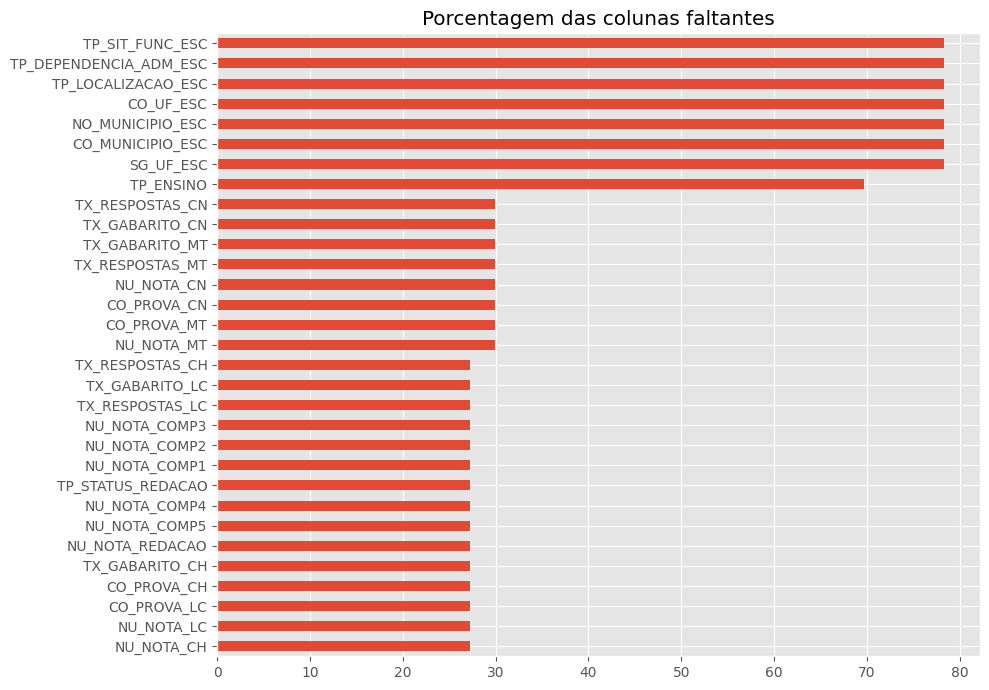

In [ ]:
missing_percentages = df_amostra.isna().sum() * 100 / len(df_amostra)
missing_percentages = round(missing_percentages, 2)
missing_percentages = missing_percentages[missing_percentages > 0]

missing_percentages_sorted = missing_percentages.sort_values(ascending=True)

plt.figure(figsize=(10,7))
missing_percentages_sorted.plot(kind='barh', title="Porcentagem das colunas faltantes")
plt.tight_layout()

Os dados que mais faltam são:

TX_GABARITO: Vetor com o gabarito da parte objetiva da prova

TX_RESPOSTAS: Vetor com as respostas da parte objetiva da prova

CO_PROVA: Código do tipo de prova

NU_NOTA: Nota da prova


Para termos uma melhor noção da interseção entre as variáveis faltantes, fizemos o seguinte gráfico:

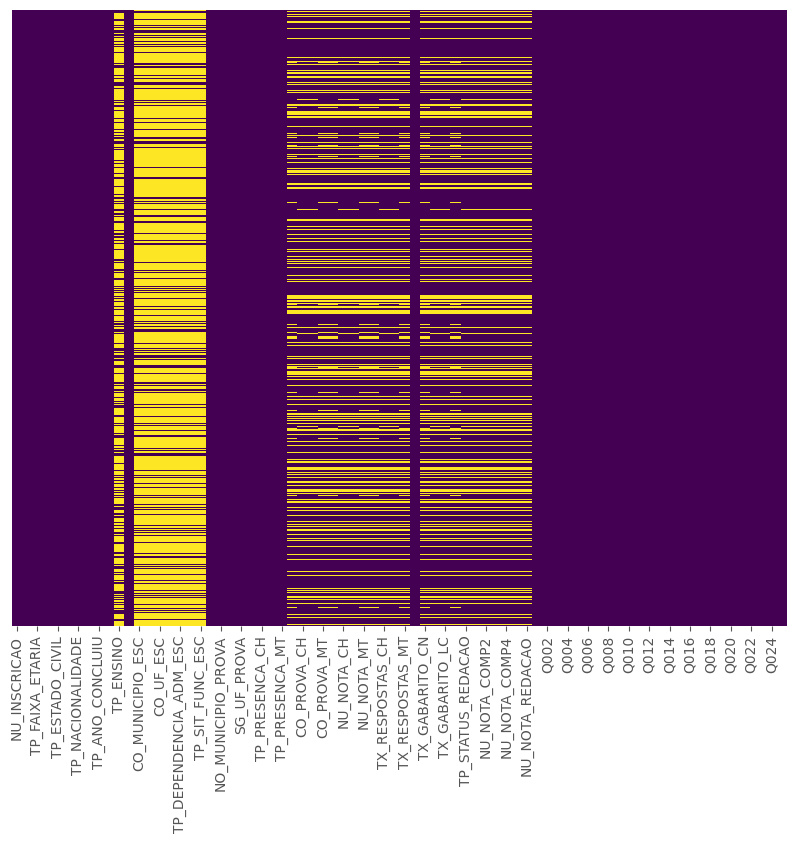

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_amostra.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.show()

Hipótese: Dados relacionados às notas, às respostas e ao tipo de prova geralmente faltam juntos, isso pode significar que os registros com intereseção de faltas nessas colunas são de pessoas que não compareceram a algum dia de prova.

Vamos ver como fica o DataSet se considerarmos apenas os registros relativos aos presentes na prova.

In [ ]:
print(len(df_amostra))

427200


In [ ]:
df_presentes = df_amostra[
    (df_amostra['TP_PRESENCA_CN'] == 1) &
    (df_amostra['TP_PRESENCA_CH'] == 1) &
    (df_amostra['TP_PRESENCA_LC'] == 1) &
    (df_amostra['TP_PRESENCA_MT'] == 1)
].copy()

In [ ]:
print('Total de dados do Nordeste: ' + str(len(df_amostra)))
print('Dados sobre presentes no Nordeste: ' + str(len(df_presentes)))

print('Porcentagem de dados sobre presentes: ' + str(round(len(df_presentes)/len(df_amostra)*100, 2)) + '%')

Total de dados do Nordeste: 427200
Dados sobre presentes no Nordeste: 298114
Porcentagem de dados sobre presentes: 69.78%


Com isso, podemos perceber que a quantidade de dados sobre os presentes é bem extensa, o que será suficiente para a nossa análise.

Mais uma vez, vamos gerar o gráfico de valores faltantes.

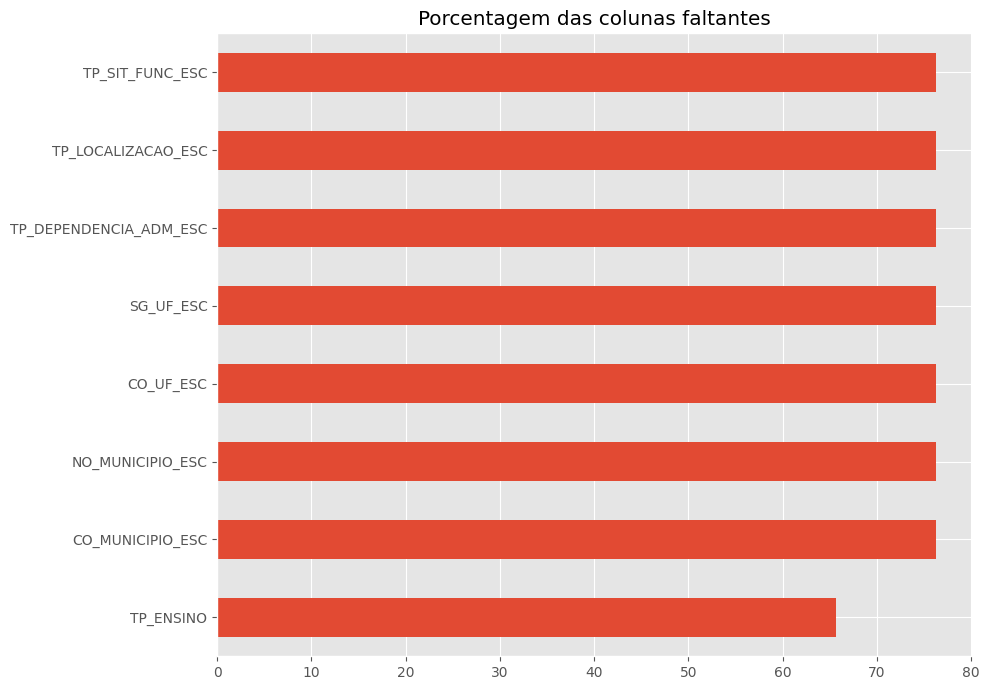

In [ ]:
missing_percentages = df_presentes.isna().sum() * 100 / len(df_presentes)
missing_percentages = round(missing_percentages, 2)
missing_percentages = missing_percentages[missing_percentages > 0]

missing_percentages_sorted = missing_percentages.sort_values(ascending=True)

plt.figure(figsize=(10,7))
missing_percentages_sorted.plot(kind='barh', title="Porcentagem das colunas faltantes")
plt.tight_layout()

Hipótese confirmada!
Ao excluir os ausentes na prova, maioria das colunas com dados faltantes some.

Porém, ainda temos um grande número de valores faltantes.

Essas colunas se referem à escola do participante. Essas informações só estão disponíveis se o participante informou o código da escola no ato da inscrição. Se isso não aconteceu, essas colunas ficam vazias.

Razões comuns para isso são:


*   Não são obrigados a preencher essa informação — o campo de escola é opcional no cadastro.
*   Participantes fora da escola
*   Escolas não cadastradas corretamente no sistema do INEP



Como não vamos realizar análises sobre essas variáveis no momento, podemos manter a base de dados como está.

# Criando colunas

## Números de acertos:

Durante a análise exploratória, identificamos que as colunas `TX_RESPOSTAS_*` (`TX_RESPOSTAS_CN`, `TX_RESPOSTAS_CH`, `TX_RESPOSTAS_LC` e `TX_RESPOSTAS_MT`) contêm apenas um ID que representa as respostas dadas pelos participantes nas quatro áreas avaliadas no ENEM. Essas informações, por si só, não indicam se as respostas estão corretas, o que limita sua utilidade para análise de desempenho.

Para resolver isso, combinamos cada coluna de respostas com a respectiva coluna de gabarito oficial (`TX_GABARITO_*`) e, com o uso de uma função (`contar_acertos`), calculamos o número total de acertos de cada participante em cada área e de maneira geral na prova. Os resultados foram armazenados em novas colunas: `ACERTOS_CN`, `ACERTOS_CH`, `ACERTOS_LC`, `ACERTOS_MT`e `ACERTOS_GERAL`

Essa transformação foi aplicada aos participantes presentes nas provas, e tem como objetivo **facilitar a visualização, a comparação e a análise do desempenho individual e coletivo**. Com isso, será possível investigar padrões de acerto entre diferentes grupos sociais, regiões ou perfis de estudantes de forma muito mais clara e objetiva.

In [ ]:
def contar_acertos(respostas, gabarito):
    if pd.isnull(respostas) or pd.isnull(gabarito):
        return np.nan
    return sum(r == g for r, g in zip(respostas, gabarito))

# Aplicando para todas as provas
df_presentes['ACERTOS_CN'] = df_presentes.apply(lambda x: contar_acertos(x['TX_RESPOSTAS_CN'], x['TX_GABARITO_CN']), axis=1)
df_presentes['ACERTOS_MT'] = df_presentes.apply(lambda x: contar_acertos(x['TX_RESPOSTAS_MT'], x['TX_GABARITO_MT']), axis=1)
df_presentes['ACERTOS_LC'] = df_presentes.apply(lambda x: contar_acertos(x['TX_RESPOSTAS_LC'], x['TX_GABARITO_LC']), axis=1)
df_presentes['ACERTOS_CH'] = df_presentes.apply(lambda x: contar_acertos(x['TX_RESPOSTAS_CH'], x['TX_GABARITO_CH']), axis=1)
df_presentes['ACERTOS_GERAL'] = (
    df_presentes['ACERTOS_CN'] +
    df_presentes['ACERTOS_MT'] +
    df_presentes['ACERTOS_LC'] +
    df_presentes['ACERTOS_CH']
)

Removendo as colunas de respostas e gabaritos após cruzamento dos dados

In [ ]:
df_presentes.drop(columns=[
    'TX_RESPOSTAS_CN', 'TX_GABARITO_CN',
    'TX_RESPOSTAS_MT', 'TX_GABARITO_MT',
    'TX_RESPOSTAS_LC', 'TX_GABARITO_LC',
    'TX_RESPOSTAS_CH', 'TX_GABARITO_CH'
], inplace=True)


Verificando as operações:

In [ ]:
print(df_presentes.columns)


Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q0

## Nota média nas questões objetivas


Essa coluna é criada com o intuito de facilitar o cálculo das médias entre os estados na criação dos rankings.

In [ ]:
notas_objetivas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

df_presentes['MEDIA_OBJETIVAS'] = df_presentes[notas_objetivas].mean(axis=1)


In [ ]:
df_presentes.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q0

## Renda per capita familiar

Para realizar análises com base em renda, vamos criar a coluna RendaPerCapita,para realizar uma análise socioeconômica mais objetiva e mensurável, optamos por utilizar as questões Q005 e Q006 do questionário socioeconômico do ENEM. Essas duas perguntas permitem estimar a renda per capita familiar, um indicador amplamente utilizado para avaliar o nível de renda e desigualdade entre domicílios.

Q005 - "Incluindo você, quantas pessoas moram atualmente em sua residência?"

Esta pergunta fornece a quantidade de indivíduos que compartilham os recursos da família, sendo essencial para o cálculo per capita.

Q006 - "Qual é a renda mensal de sua família?"

Essa questão traz a estimativa da renda total do domicílio em faixas de valores. Para transformar essas faixas em valores numéricos utilizáveis, criamos um dicionário que associa cada alternativa à média do intervalo correspondente. Assim, conseguimos aproximar um valor contínuo de renda familiar.

Com essas perguntas, poderemos calcular a renda *per capita* familiar

In [ ]:
renda_media = {
    'A': 0,                            # Nenhuma Renda
    'B': 1320,                         # Até R$ 1.320,00
    'C': 1650,                         # De R$ 1.320,01 até R$ 1.980,00
    'D': 2310,                         # De R$ 1.980,01 até R$ 2.640,00
    'E': 2970,                         # De R$ 2.640,01 até R$ 3.300,00
    'F': 3630,                         # De R$ 3.300,01 até R$ 3.960,00
    'G': 4620,                         # De R$ 3.960,01 até R$ 5.280,00
    'H': 5940,                         # De R$ 5.280,01 até R$ 6.600,00
    'I': 7260,                         # De R$ 6.600,01 até R$ 7.920,00
    'J': 8580,                         # De R$ 7.920,01 até R$ 9.240,00
    'K': 9900,                         # De R$ 9.240,01 até R$ 10.560,00
    'L': 11220,                        # De R$ 10.560,01 até R$ 11.880,00
    'M': 12540,                        # De R$ 11.880,01 até R$ 13.200,00
    'N': 14510,                        # De R$ 13.200,01 até R$ 15.840,00
    'O': 17820,                        # De R$ 15.840,01 até R$ 19.800,00
    'P': 23100,                        # De R$ 19.800,01 até R$ 26.400,00
    'Q': 30000                         # Acima de R$ 26.400,00
}


Com base na resposta 006 iremos dividir esse valor pela resposta da pergunta 005 para chegarmos a renda per capita da familia.

In [ ]:
def calcular_renda_per_capita(row):
    renda_total = renda_media[row['Q006']]
    return renda_total / row['Q005']

df_presentes['renda_per_capita'] = df_presentes.apply(calcular_renda_per_capita, axis=1)

Agora, veremos se as colunas do dataframe

In [ ]:
df_presentes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298114 entries, 1389643 to 3257918
Data columns (total 75 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            298114 non-null  int64  
 1   NU_ANO                  298114 non-null  int64  
 2   TP_FAIXA_ETARIA         298114 non-null  int64  
 3   TP_SEXO                 298114 non-null  object 
 4   TP_ESTADO_CIVIL         298114 non-null  int64  
 5   TP_COR_RACA             298114 non-null  int64  
 6   TP_NACIONALIDADE        298114 non-null  int64  
 7   TP_ST_CONCLUSAO         298114 non-null  int64  
 8   TP_ANO_CONCLUIU         298114 non-null  int64  
 9   TP_ESCOLA               298114 non-null  int64  
 10  TP_ENSINO               102456 non-null  float64
 11  IN_TREINEIRO            298114 non-null  int64  
 12  CO_MUNICIPIO_ESC        70858 non-null   float64
 13  NO_MUNICIPIO_ESC        70858 non-null   object 
 14  CO_UF_ESC         

# Novo csv

In [ ]:
df_presentes.to_csv("ENEM_nordeste.csv", index=False)

# Análise Exploratória de Dados

## Visualização das Notas por Área do Conhecimento

A análise das notas médias por Área do Conhecimento permite avaliar o desempenho geral dos estudantes em disciplinas específicas, indica a qualidade do ensino da escola, e, cruzando os dados, expõe quais classes possuem as médias mais baixas e as mais altas, sendo essencial para produzir hipóteses e  insights.


Assim, calcularemos a média das notas por áreas do conhecimento e deixaremos na ordem decrescente para identificarmos a maior e a menor média.

In [ ]:
notas = df_presentes[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

notas_medias = notas.mean().sort_values(ascending=False)
print("Médias:")
print(notas_medias)

print("\n" + "="*40 + "\n")

medianas = notas.median().sort_values(ascending=False)
print("Medianas:")
print(medianas)

print("\n" + "="*40 + "\n")

variancias = notas.var().sort_values(ascending=False)
print("Variâncias:")
print(variancias)

print("\n" + "="*40 + "\n")

amplitudes = (notas.max() - notas.min()).sort_values(ascending=False)
print("Amplitudes:")
print(amplitudes)


Médias:
NU_NOTA_REDACAO    614.921339
NU_NOTA_MT         511.652604
NU_NOTA_CH         510.288492
NU_NOTA_LC         505.731764
NU_NOTA_CN         482.211846
dtype: float64


Medianas:
NU_NOTA_REDACAO    620.0
NU_NOTA_CH         514.9
NU_NOTA_LC         508.6
NU_NOTA_MT         493.8
NU_NOTA_CN         477.9
dtype: float64


Variâncias:
NU_NOTA_REDACAO    48821.594514
NU_NOTA_MT         15973.243348
NU_NOTA_CH          7761.511605
NU_NOTA_CN          7136.641996
NU_NOTA_LC          5738.264021
dtype: float64


Amplitudes:
NU_NOTA_REDACAO    1000.0
NU_NOTA_MT          958.6
NU_NOTA_CN          856.7
NU_NOTA_CH          823.0
NU_NOTA_LC          788.8
dtype: float64


Agora, vamos verificar se existe uma grande variabilidade nas notas de cada área do conhecimento

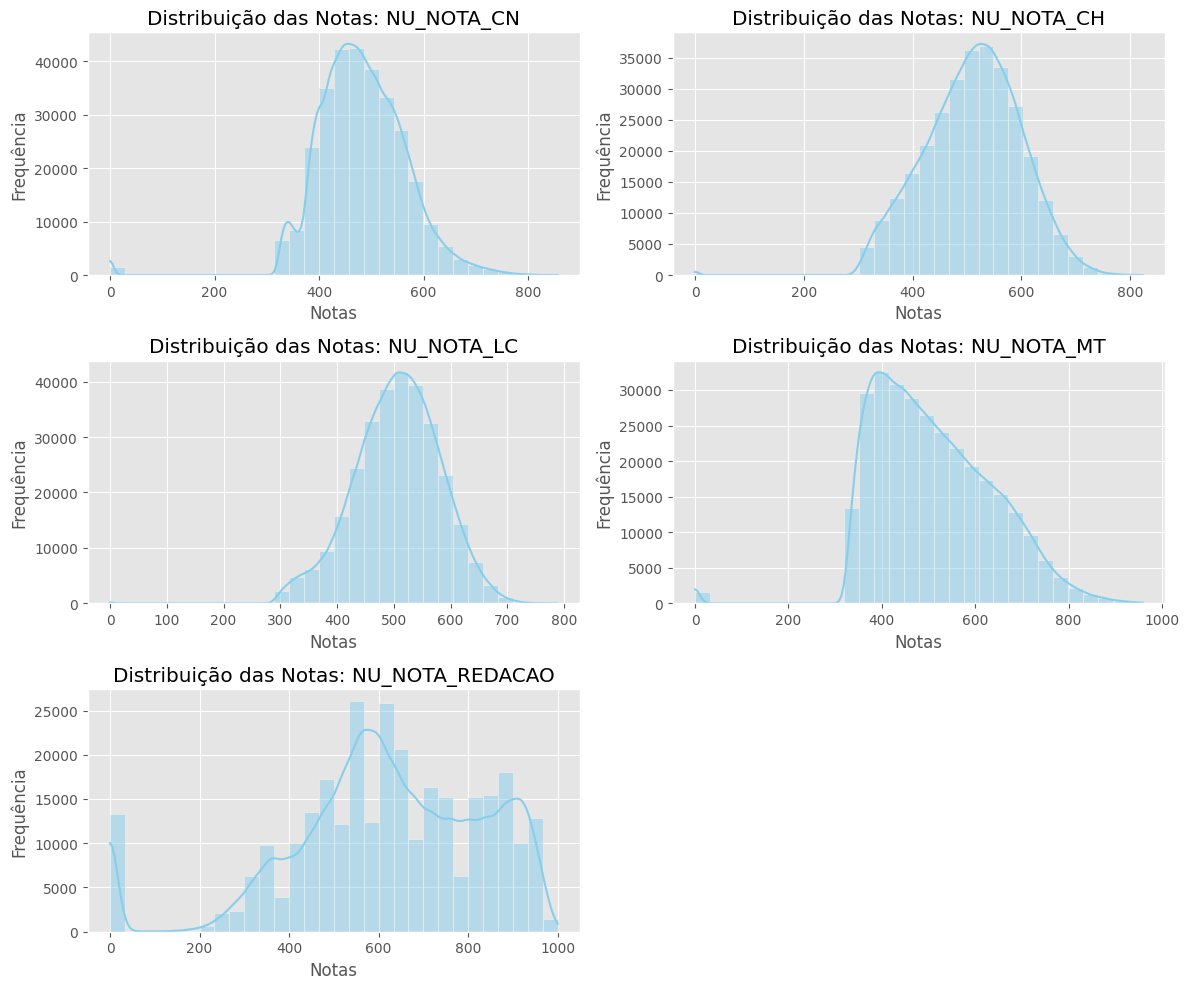

In [ ]:
areas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

for i, area in enumerate(areas):
    sns.histplot(df_presentes[area], bins=30, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribuição das Notas: {area}')
    axes[i].set_xlabel('Notas')
    axes[i].set_ylabel('Frequência')

# Remove o subplot extra (o 6º)
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

A nota da prova de Matemática varia em um intervalo maior, em comparação com as outras provas. Portanto, avaliar o desempenho dos participantes nessa prova permite ter uma compreensão melhor da discrepância entre os resultados.

 ## Análise do desempenho com base na renda

Para entender melhor a distribuição de renda, vamos fazer um boxplot.

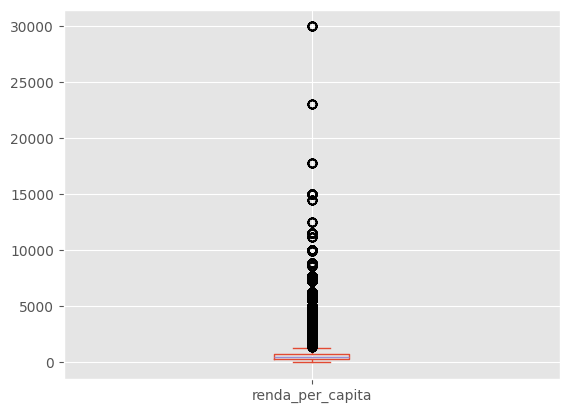

In [ ]:
df_presentes[['renda_per_capita']].plot(kind='box')
plt.show()

Claramente existem outliers, mas eles condizem com a desigualdade social do país.
Vamos gerar um gráfico sem eles, para termos  uma maior clareza.

<Figure size 400x800 with 0 Axes>

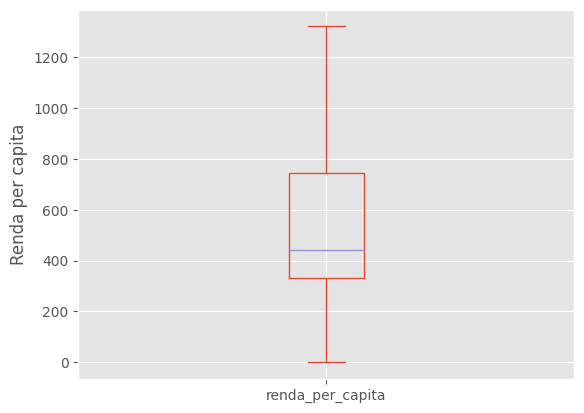

In [ ]:
plt.figure(figsize=(4, 8))
df_presentes[['renda_per_capita']].plot(kind='box', vert=True, showfliers=False)
plt.ylabel('Renda per capita')
plt.grid(True)
plt.show()



Vamos ver as estatísticas a respeito dessa coluna por escrito.

In [ ]:
df_presentes['renda_per_capita'].describe()

,renda_per_capita
count,298114.000000
mean,768.814595
std,1181.318544
min,0.000000
25%,330.000000
50%,440.000000
75%,742.500000
max,30000.000000


É possível perceber que a  remoção dos outliers proporciona uma representação mais fiel da realidade socioeconômica da maior parte dos candidatos, reduzindo a distorção causada por rendas excepcionalmente altas

In [ ]:
df_presentes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298114 entries, 1389643 to 3257918
Data columns (total 75 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            298114 non-null  int64  
 1   NU_ANO                  298114 non-null  int64  
 2   TP_FAIXA_ETARIA         298114 non-null  int64  
 3   TP_SEXO                 298114 non-null  object 
 4   TP_ESTADO_CIVIL         298114 non-null  int64  
 5   TP_COR_RACA             298114 non-null  int64  
 6   TP_NACIONALIDADE        298114 non-null  int64  
 7   TP_ST_CONCLUSAO         298114 non-null  int64  
 8   TP_ANO_CONCLUIU         298114 non-null  int64  
 9   TP_ESCOLA               298114 non-null  int64  
 10  TP_ENSINO               102456 non-null  float64
 11  IN_TREINEIRO            298114 non-null  int64  
 12  CO_MUNICIPIO_ESC        70858 non-null   float64
 13  NO_MUNICIPIO_ESC        70858 non-null   object 
 14  CO_UF_ESC         

### Nota da redação

Optamos por focar primeiramente a análise na nota da redação do ENEM em vez das notas das provas objetivas por diversos motivos que tornam esse componente especialmente relevante do ponto de vista educacional e social.

Primeiramente, a redação é a única parte da prova avaliada de forma discursiva e subjetiva, exigindo do participante habilidades como argumentação, domínio da norma culta da língua portuguesa, coesão, coerência e compreensão crítica de temas sociais. Isso permite avaliar competências que vão além do conhecimento técnico e factual, oferecendo uma dimensão mais completa do desempenho do estudante.

Além disso, a redação tem um **peso significativo nos processos seletivos** como o SISU, o PROUNI e o FIES, e muitas vezes é decisiva para a aprovação, especialmente em cursos concorridos. Portanto, compreender os fatores que influenciam essa nota pode fornecer **insights valiosos sobre desigualdades educacionais**, acesso à escrita formal, capacidade de argumentação e influência do contexto socioeconômico.

Também destacamos que a nota da redação varia de 0 a 1000 de forma contínua (diferente das notas das áreas objetivas, que passam por um processo de Teoria de Resposta ao Item - TRI), o que **facilita a análise estatística direta** e comparações com variáveis socioeconômicas.

Por esses motivos, acreditamos que focar na análise da redação nos permite compreender melhor as disparidades e desafios enfrentados por diferentes grupos de participantes, além de contribuir com discussões sobre equidade no ensino da linguagem e na formação crítica dos estudantes.

Criaremos um gráfico de dispersão para visualizar como a nota da redação se comporta com relação a renda.

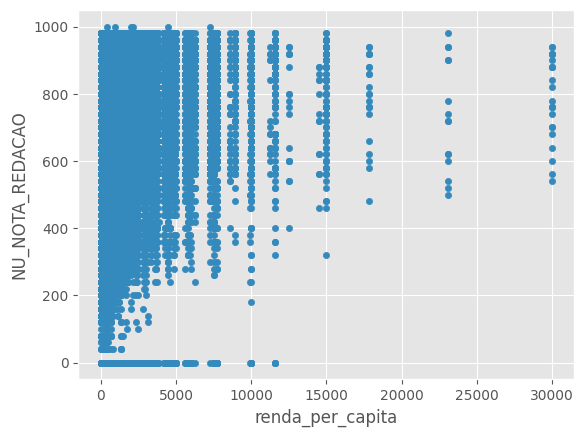

In [ ]:
df_presentes.plot.scatter(x='renda_per_capita',y='NU_NOTA_REDACAO')
plt.show()

Nesse gráfico, observou-se que a maioria dos dados ficou concentrada em uma faixa relativamente estreita de renda. Por esse motivo, optamos por remover temporariamente os outliers para gerar uma visualização mais clara e focada na faixa de renda mais presente, facilitando a interpretação da relação entre as variáveis:


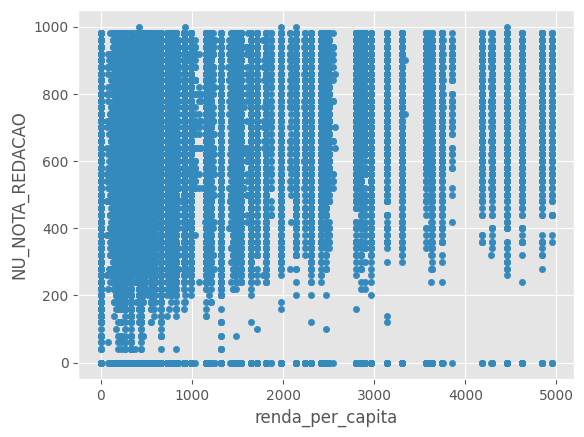

In [ ]:
df_filtrado = df_presentes[df_presentes['renda_per_capita'] < 5000]
df_filtrado.plot.scatter(x='renda_per_capita', y='NU_NOTA_REDACAO')
plt.show()

Apesar da dispersão considerável nas notas, é possível perceber uma tendência de aumento na nota da redação conforme a renda per capita cresce.


Interessante: as pessoas com as notas mais altas na redação (próximo a 1000) tem a renda per capita familiar mais baixa.
Uma análise estatística permitirá analisar melhor esse aspecto.

Vamos visualizar a quantidade de notas 1000 que possuimos e em que faixa de renda per capita elas se localizam:

In [ ]:
mil_na_redacao = df_presentes[df_presentes['NU_NOTA_REDACAO'] == 1000]

print(f"Quantidade de participantes que tiraram 1000 na redação na amostra: {mil_na_redacao.shape[0]}\n")

print("Renda per capita de cada nota mil:")
print(mil_na_redacao['renda_per_capita'].value_counts().sort_index())



Quantidade de participantes que tiraram 1000 na redação na amostra: 6

Renda per capita de cada nota mil:
renda_per_capita
412.5     1
924.0     1
1980.0    1
2145.0    1
4455.0    1
7255.0    1
Name: count, dtype: int64


Segundo essa [reportagem](https://www.educamaisbrasil.com.br/educacao/enem/enem-2023-regiao-nordeste-concentra-mais-redacoes-nota-mil) 25 pessoas tiraram nota 1000 na redação no nordeste.

Pelo gráfico, podemos ver apenas 6 pessoas com essa nota, o que faz sentido uma vez que pegamos uma amostra aleatória dos dados da região Nordeste.


Podemos observar que, conforme a renda per capita da família aumenta, a nota da redação também aumenta.

### Nota de Matemática

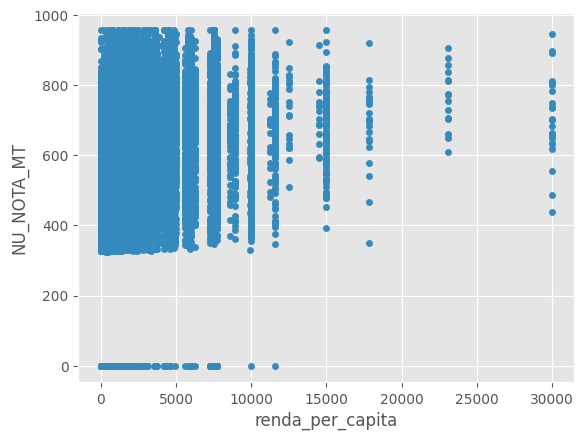

In [ ]:
df_presentes.plot.scatter(x='renda_per_capita',y='NU_NOTA_MT')
plt.show()

Além da redação, optamos por aprofundar nossa análise na prova de Matemática e suas Tecnologias por ela apresentar características interessantes do ponto de vista estatístico e socioeducacional.

Inicialmente, observamos que as **diferenças nas notas de Matemática entre os participantes não são tão discrepantes quanto as observadas na redação (na análise univariada), o que sugere uma distribuição mais homogênea. No entanto, ao cruzarmos esses dados com informações socioeconômicas, percebemos uma **tendência clara de aumento nas notas conforme a classe social se eleva**.

Esse padrão indica que, mesmo em uma prova objetiva e padronizada, **as desigualdades de acesso à educação e recursos de aprendizagem continuam influenciando significativamente o desempenho dos estudantes**. A matemática, por ser uma disciplina que depende fortemente de prática, base escolar sólida e acesso a bons materiais, acaba refletindo de forma sutil, mas consistente, os impactos do contexto socioeconômico.

Além disso, por ser uma das áreas com maior peso nos processos seletivos e considerada uma das mais desafiadoras para grande parte dos estudantes, a análise das notas de Matemática pode trazer insights relevantes sobre a qualidade do ensino e a equidade no acesso ao conhecimento lógico-matemático no Brasil.




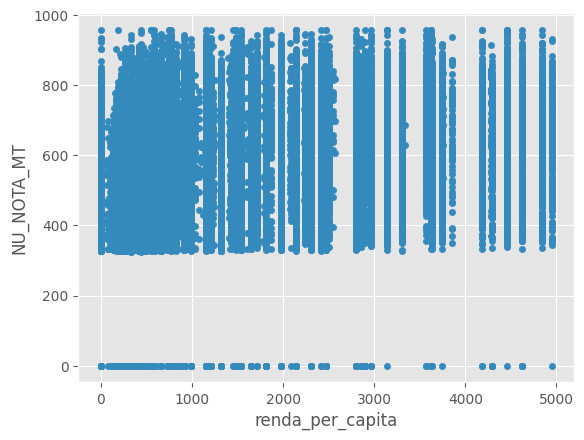

In [ ]:
df_filtrado = df_presentes[df_presentes['renda_per_capita'] < 5000]
df_filtrado.plot.scatter(x='renda_per_capita', y='NU_NOTA_MT')

plt.show()

Possui uma distribuição mais homogênea, em todas as faixas de renda existem notas altas e baixas. Podendo ser mais observada com a diminuição de notas zero conforme a renda aumenta. Esse padrão evidencia que, mesmo em uma prova objetiva e padronizada, desigualdades de acesso à educação e recursos influenciam o resultado.


### Nota de Ciências da Natureza

O aprofundamento a área de Ciências da Natureza se dá devido ela ser a menor média em relação às outras áreas, o que pode indicar um problema estrutural no aprendizado dessa vertente na região. Essa área exige conhecimentos interdisciplinares e muita prática em laboratórios, o que levanta questionamentos sobre a eficiência da metodologia atual. Além disso, a infraestrutura escolar no Brasil muitas vezes não é adequada para oferecer uma abordagem mais prática e contextualizada, que envolva os estudantes no cotidiano dos temas abordados. Considerando que o Enem cobra justamente essa aplicação prática por meio de situações-problema, a dificuldade em desenvolver essas competências em sala de aula, causada por diversos fatores, incluindo limitações estruturais, torna a análise dessa área essencial para entender os desafios educacionais enfrentados

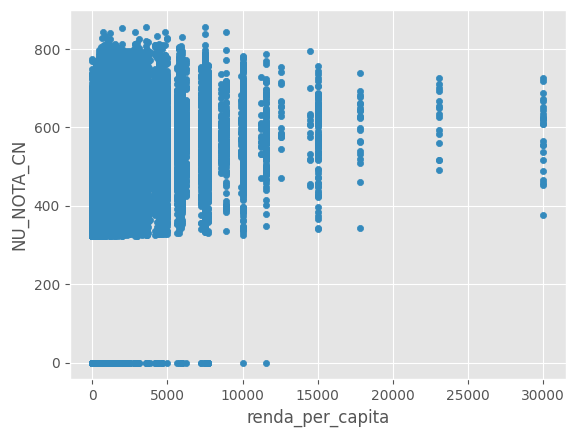

In [ ]:
df_presentes.plot.scatter(x='renda_per_capita',y='NU_NOTA_CN')
plt.show()

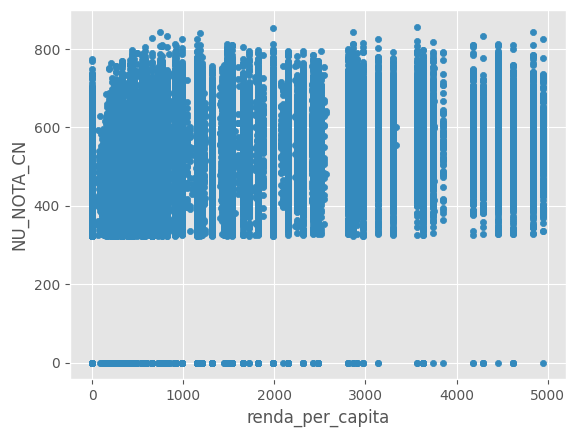

In [ ]:
df_filtrado = df_presentes[df_presentes['renda_per_capita'] < 5000]

df_filtrado.plot.scatter(x='renda_per_capita', y='NU_NOTA_CN')

plt.show()

## Análise do Desempenho com Base em Raça

Primeiro vamos analisar o desempenho por raça na prova de matemática:

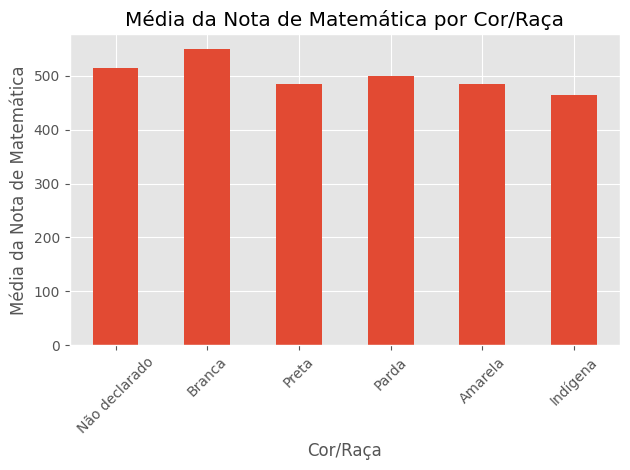

In [ ]:
media_por_raca = df_presentes.groupby('TP_COR_RACA')['NU_NOTA_MT'].mean().reset_index()

media_por_raca.plot.bar(x='TP_COR_RACA', y='NU_NOTA_MT', legend=False)

plt.xticks(ticks=range(6), labels=[
    'Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'
], rotation=45)

plt.ylabel('Média da Nota de Matemática')
plt.xlabel('Cor/Raça')
plt.title('Média da Nota de Matemática por Cor/Raça')
plt.tight_layout()
plt.show()


Interessante! Nós imaginavamos que haveria uma discrepância maior entre os valores porém observa-se uma maior variação entre as médias (em comparação com as outras provas), com os participantes que não declararam cor/raça e os de cor branca apresentando os melhores desempenhos, com médias acima de 500 pontos. Já os estudantes autodeclarados pretos, pardos, amarelos e indígenas concentram-se em faixas inferiores de desempenho, com destaque para os indígenas, que apresentam a menor média entre os grupos.

Vamos analisar o desempenho por raça na prova de ciências da natureza:

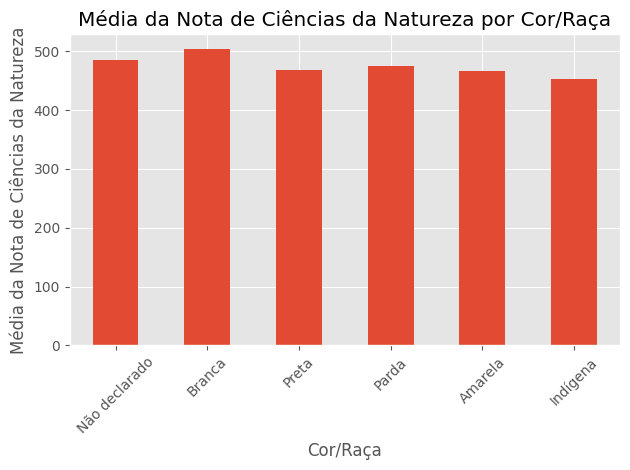

In [ ]:
media_por_raca = df_presentes.groupby('TP_COR_RACA')['NU_NOTA_CN'].mean().reset_index()

media_por_raca.plot.bar(x='TP_COR_RACA', y='NU_NOTA_CN', legend=False)

plt.xticks(ticks=range(6), labels=[
    'Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'
], rotation=45)

plt.ylabel('Média da Nota de Ciências da Natureza')
plt.xlabel('Cor/Raça')
plt.title('Média da Nota de Ciências da Natureza por Cor/Raça')
plt.tight_layout()
plt.show()

  Vamos analisar o desempenho por raça na prova de Linguagens:

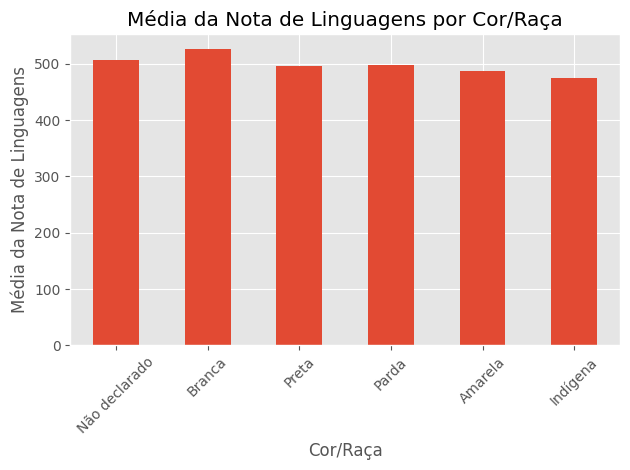

In [ ]:
media_por_raca = df_presentes.groupby('TP_COR_RACA')['NU_NOTA_LC'].mean().reset_index()

media_por_raca.plot.bar(x='TP_COR_RACA', y='NU_NOTA_LC', legend=False)

plt.xticks(ticks=range(6), labels=[
    'Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'
], rotation=45)

plt.ylabel('Média da Nota de Linguagens')
plt.xlabel('Cor/Raça')
plt.title('Média da Nota de Linguagens por Cor/Raça')
plt.tight_layout()
plt.show()

Camos analisar o desempenho por raça na prova de ciências humanas:

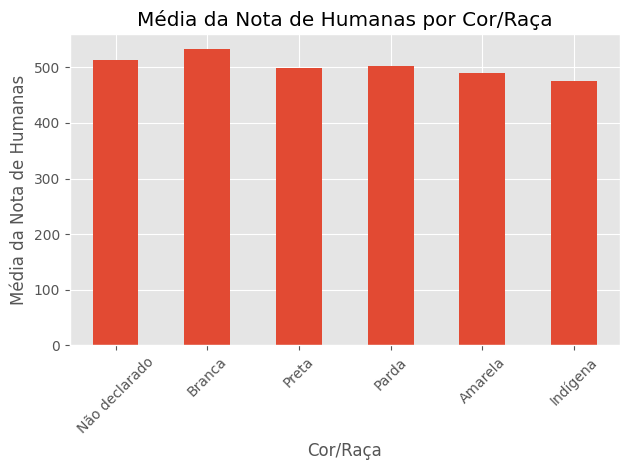

In [ ]:
media_por_raca = df_presentes.groupby('TP_COR_RACA')['NU_NOTA_CH'].mean().reset_index()

media_por_raca.plot.bar(x='TP_COR_RACA', y='NU_NOTA_CH', legend=False)

plt.xticks(ticks=range(6), labels=[
    'Não declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena'
], rotation=45)

plt.ylabel('Média da Nota de Humanas')
plt.xlabel('Cor/Raça')
plt.title('Média da Nota de Humanas por Cor/Raça')
plt.tight_layout()
plt.show()

 Tanto em ciências da natureza, linguagens e ciências humanas, observa-se uma menor discrepância entre os grupos raciais quando comparado às provas de matemática. ainda assim, os dados revelam uma tendência sistemática: estudantes brancos e não declarados obtêm as maiores médias em todas as áreas do conhecimento, enquanto os indígenas apresentam as menores médias, apontando para desigualdades persistentes no desempenho educacional.


## Análise do impacto do tipo de escola (pública ou privada) no desempenho

Vamos verificar a quantidade de alunos por tipo de escola:


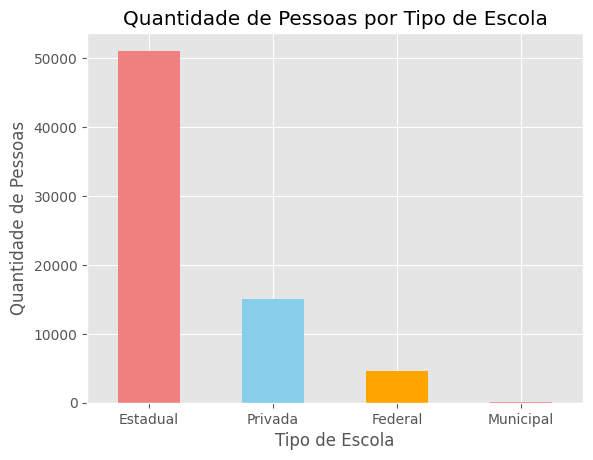

In [ ]:
contagem_escolas = df_presentes['TP_DEPENDENCIA_ADM_ESC'].value_counts()

ax = contagem_escolas.plot(kind='bar', color=['lightcoral', 'skyblue', 'orange'])

plt.xticks(ticks=[0, 1, 2, 3], labels=['Estadual', 'Privada','Federal', 'Municipal'], rotation=0)

plt.title('Quantidade de Pessoas por Tipo de Escola')
plt.xlabel('Tipo de Escola')
plt.ylabel('Quantidade de Pessoas')

plt.show()

Observa-se uma quantidade significativa de participantes provenientes de escolas estaduais e privadas, enquanto a participação de estudantes de escolas federais é menor por conta número mais restrito de vagas oferecidas por essa rede de ensino em comparação com as redes estadual e privada. A ausência de candidatos de escolas municipais é justificada pelo fato de que, no Brasil, o ensino médio geralmente não é ofertado por essa esfera administrativa. As escolas municipais concentram-se, em sua maioria, na educação infantil e no ensino fundamental. Portanto, os dados apresentados no gráfico refletem a organização do sistema educacional brasileiro em relação aos níveis de ensino e às redes de oferta.

In [ ]:
contagem_escolas = df_presentes['TP_ESCOLA'].value_counts()
print(contagem_escolas)


TP_ESCOLA
1    192895
2     88691
3     16528
Name: count, dtype: int64


Primeiramente, vamos visualizar a nota média da redação da esfera pública como um todo:

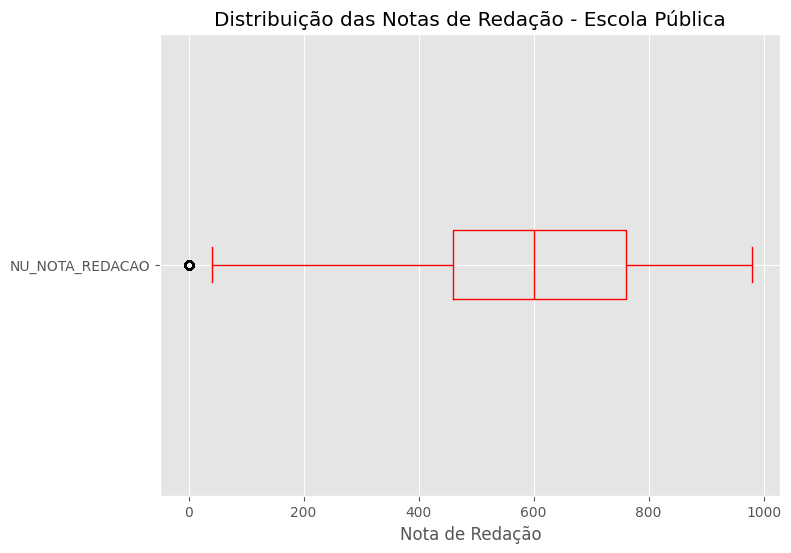

In [ ]:
df_publica = df_presentes[df_presentes['TP_ESCOLA'] == 2]
plt.figure(figsize=(8, 6))
df_publica['NU_NOTA_REDACAO'].plot(kind='box', vert=False, color='red')

plt.title('Distribuição das Notas de Redação - Escola Pública')
plt.xlabel('Nota de Redação')

plt.show()

Agora, vamos analisar as notas das escolas particulares:

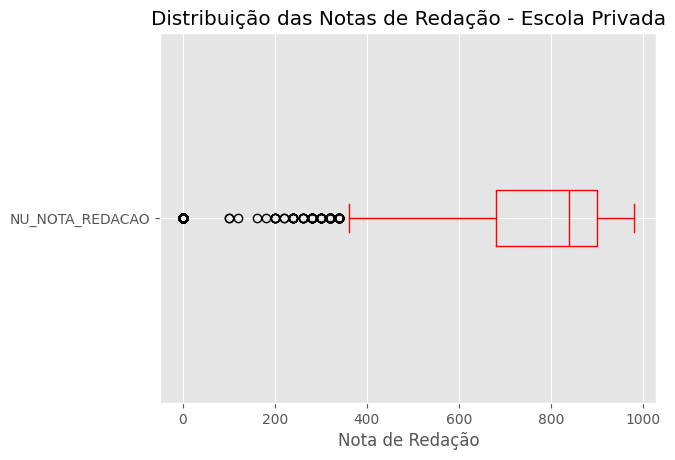

In [ ]:
df_privada = df_presentes[df_presentes['TP_ESCOLA'] == 3]

df_privada['NU_NOTA_REDACAO'].plot(kind='box', vert=False, color='red')

plt.title('Distribuição das Notas de Redação - Escola Privada')
plt.xlabel('Nota de Redação')

plt.show()

Comparando ambas as estruturas administrativas percebemos que as escolas privadas saem-se melhor na prova.

Dentre as escolas públicas, existem três tipos de dependência administrativa, sendo que a federal tem uma nível de investimento consideravelmente superior.

Por isso, vamos comparar o desempesenho de alunos de escolas federais e estaduais, não compararemos com os estudantes de escolas municipais por quanta da sua quantidade infima pois no Brasil, o ensino médio geralmente não é ofertado por essa esfera administrativa

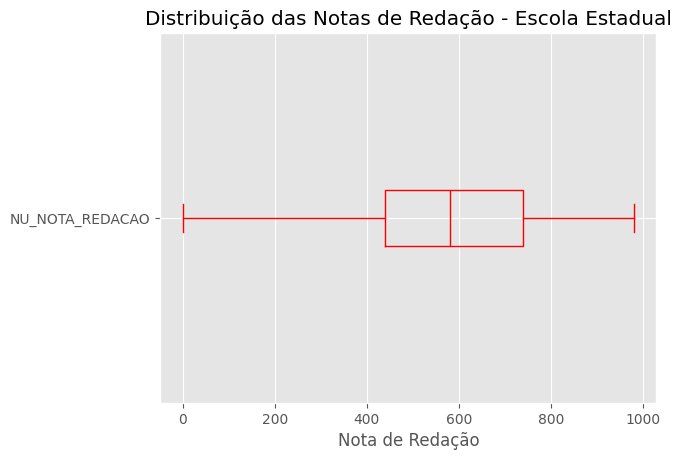

In [ ]:
df_estadual = df_presentes[df_presentes['TP_DEPENDENCIA_ADM_ESC'] == 2]

df_estadual['NU_NOTA_REDACAO'].plot(kind='box', vert=False, color='red')

plt.title('Distribuição das Notas de Redação - Escola Estadual')
plt.xlabel('Nota de Redação')

plt.show()

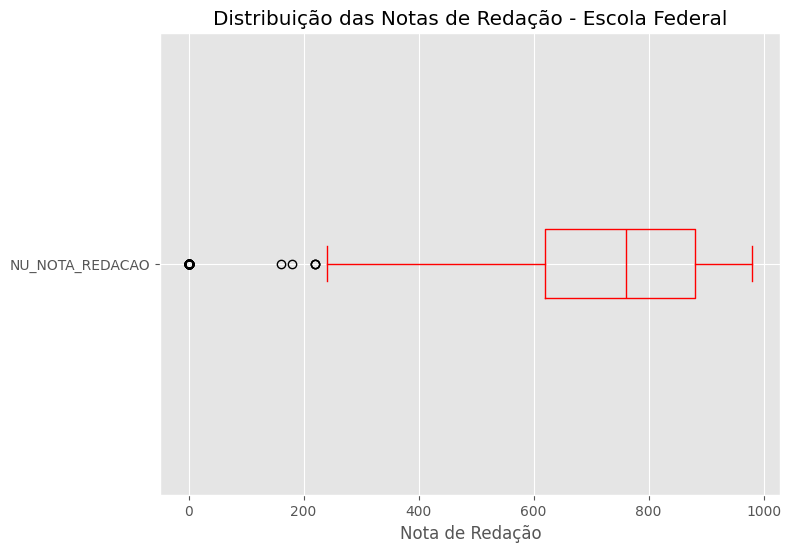

In [ ]:
df_federal = df_presentes[df_presentes['TP_DEPENDENCIA_ADM_ESC'] == 1]

plt.figure(figsize=(8, 6))
df_federal['NU_NOTA_REDACAO'].plot(kind='box', vert=False, color='red')

plt.title('Distribuição das Notas de Redação - Escola Federal')
plt.xlabel('Nota de Redação')


plt.show()

Ao analisar as médias das escolas federais e estaduais percebemos uma diferença significativa nos resultados, que reflete a relação entre investimento e qualidade do ensino. Observamos que as médias das escolas federais foram superiores às das estaduais, o que indica que o maior investimento em infraestrutura e recursos nas escolas federais contribui para um desempenho mais elevado dos estudantes. Esse padrão sugere que investimentos contínuos e estratégicos na educação têm um impacto positivo na qualidade do ensino a longo prazo, evidenciando como a melhoria das condições educacionais pode resultar em um desempenho acadêmico superior. Além disso, o acesso a essas instituições geralmente se dá por meio de seleção, o que atrai estudantes com desempenho acadêmico mais elevado desde o início do processo formativo, e também reduz a quantidade de alunos em comparação com as escolas estaduais.


## Ranking das médias da região Nordeste


 Estratégia de Análise e Ranking dos Estados

 Faremos a análise em três etapas:

1. Ranking pela Média Geral de acertos: Avaliaremos o desempenho dos estados considerando a media de acertos das questões objetivas do exame.
2. Ranking pela Média da Redação: Focaremos no desempenho específico da redação, uma das provas mais desafiadoras.
3. Ranking pela Média Geral: Avaliaremos o desempenho dos estados considerando a media de acertos e da nota da redação no exame.
4. Ranking por Nível de Ensino: Analisaremos a relação entre o nível de ensino e o desempenho nas provas.

 Após isso, os dados obtidos serão comparados com os resultados do Programa Internacional de Avaliação de Alunos (PISA) de 2023, buscando identificar semelhanças, discrepâncias e novos insights sobre o desempenho educacional nos estados.


A construção de um **ranking de médias de acertos por estado** tem como objetivo identificar disparidades regionais no desempenho dos participantes. Essa análise permite observar como diferentes fatores — como **investimentos em educação**, **infraestrutura escolar**, **acesso a recursos didáticos e tecnológicos**, e **condições socioeconômicas locais** — influenciam os resultados dos estudantes.

Ao agrupar os dados por estado, podemos:

- Facilitar a **comparação direta entre as unidades federativas**;
- Visualizar **desigualdades educacionais** de forma clara;
- Investigar a relação entre **nível de investimento e desempenho médio**;



### Ranking de média geral:

Vamos plotar um gráfico para visualizar melhor as notas médias e as disparidades entre estados

In [ ]:
ranking_notas_objetivas = (
    df_presentes.groupby('SG_UF_PROVA')['MEDIA_OBJETIVAS']
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='MEDIA_OBJETIVAS')
)

print(ranking_notas_objetivas)

  SG_UF_PROVA  MEDIA_OBJETIVAS
0          RN       514.985994
1          PE       510.594985
2          CE       506.235832
3          PB       504.970404
4          SE       502.401080
5          BA       502.212176
6          AL       498.040621
7          PI       494.298833
8          MA       483.385286


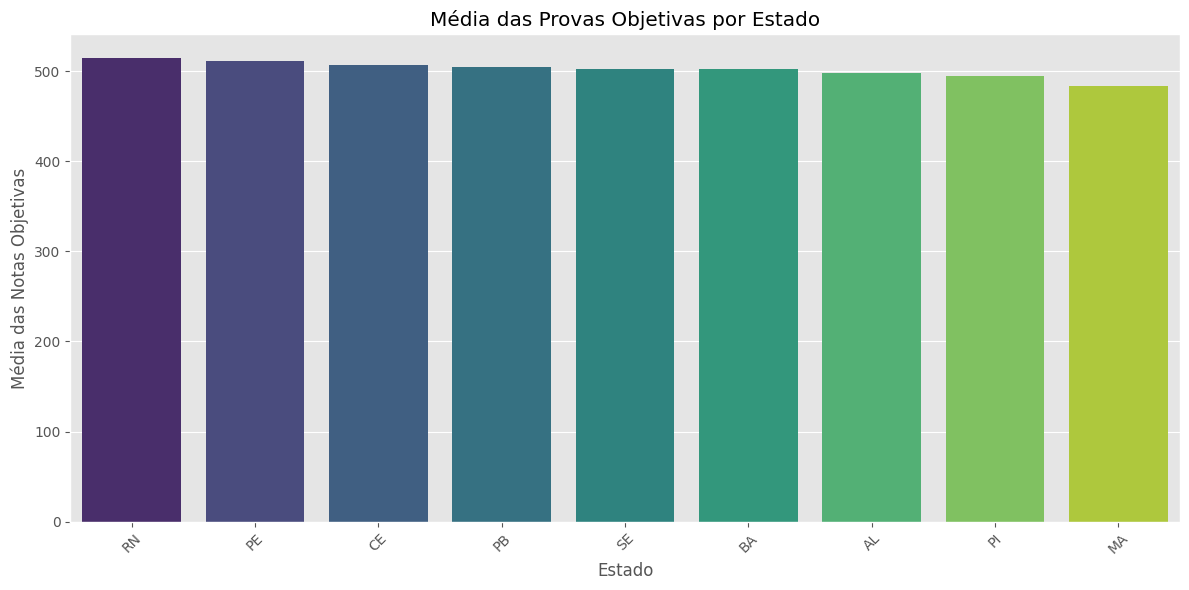

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=ranking_notas_objetivas,
    x='SG_UF_PROVA',
    y='MEDIA_OBJETIVAS',
    hue='SG_UF_PROVA',
    palette='viridis',
    dodge=False
)

plt.title('Média das Provas Objetivas por Estado')
plt.xlabel('Estado')
plt.ylabel('Média das Notas Objetivas')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

Surpreendentemente, o Ceará ficou abaixo do RN na colocação. Isso provavelmente ocorreu devido à grande população do estado.

In [ ]:
df_presentes['SG_UF_PROVA'].value_counts()

,count
SG_UF_PROVA,
BA,66130
CE,51980
PE,45818
MA,33619
PB,26411
RN,21914
PI,21431
AL,16531
SE,14280


/tmp/ipython-input-54-1885047739.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


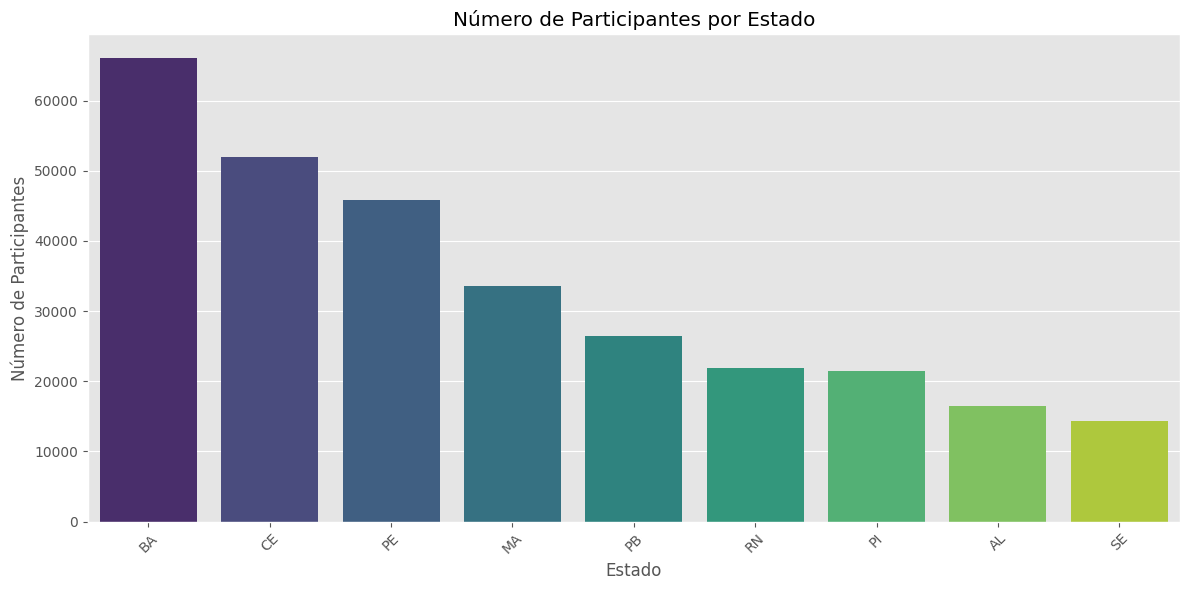

In [ ]:
plt.figure(figsize=(12, 6))

participantes = df_presentes['SG_UF_PROVA'].value_counts().reset_index()
participantes.columns = ['SG_UF_PROVA', 'NUM_PARTICIPANTES']

participantes = participantes.sort_values('NUM_PARTICIPANTES', ascending=False)

sns.barplot(
    data=participantes,
    x='SG_UF_PROVA',
    y='NUM_PARTICIPANTES',
    palette='viridis'
)

plt.title('Número de Participantes por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Participantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observando que a Bahia e o Ceará possuem um maior número de participantes isso pode ter influencia direta na dispersão das notas

### Ranking pela média da redação

Agora, vamos rankear os estados pela nota média da redação

In [ ]:
ranking_redacao = (
    df_presentes.groupby('SG_UF_PROVA')['NU_NOTA_REDACAO']
    .mean()
    .sort_values(ascending=False)
    .reset_index(name='MEDIA_NOTA_REDACAO')
)

ranking_redacao


,SG_UF_PROVA,MEDIA_NOTA_REDACAO
0,SE,633.617647
1,RN,626.656932
2,PB,625.824088
3,PE,618.672138
4,CE,616.479415
5,PI,615.664225
6,BA,613.445940
7,AL,605.283407
8,MA,590.411969


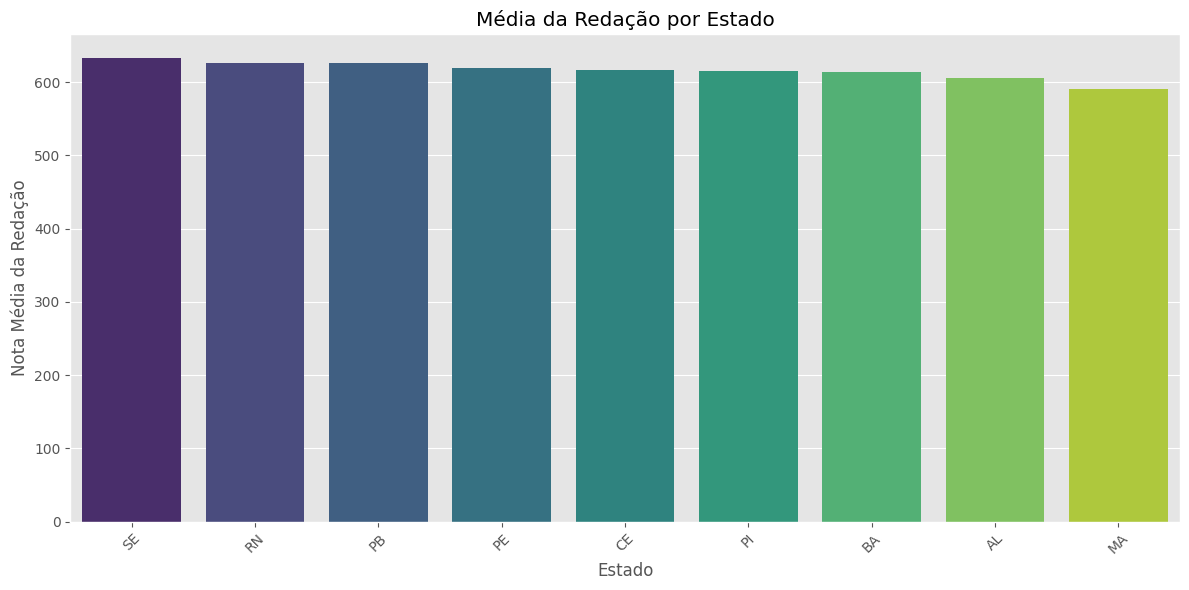

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=ranking_redacao,
    x='SG_UF_PROVA',
    y='MEDIA_NOTA_REDACAO',
    hue='SG_UF_PROVA',
    palette='viridis',
    dodge=False
)
plt.title('Média da Redação por Estado')
plt.xlabel('Estado')
plt.ylabel('Nota Média da Redação')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 	Ao comparar esses resultados com os das provas objetivas, Sergipe (SE) aparece em destaque, ocupando a primeira posição com a maior média de redação,uma mudança consideravel visto que na média de questões objetivas ele ficou em 5º lugar.  Estados como Ceará (CE) e Pernambuco (PE), que tinham melhor desempenho nas provas objetivas, caem algumas posições na redação. Essa mudança sugere que o desempenho em redação depende de fatores distintos, como habilidades de escrita, repertório sociocultural e estímulo à produção textual nas escolas, o que pode variar significativamente entre as redes de ensino dos estados.


### Ranking pela média geral dos estudantes

In [ ]:
media_redacao = (
    df_presentes.groupby('SG_UF_PROVA')['NU_NOTA_REDACAO']
    .mean()
    .reset_index(name='MEDIA_NOTA_REDACAO')
)

media_objetivas = (
    df_presentes.groupby('SG_UF_PROVA')['MEDIA_OBJETIVAS']
    .mean()
    .reset_index(name='MEDIA_OBJETIVAS')
)

media_geral_estados = pd.merge(media_objetivas, media_redacao, on='SG_UF_PROVA')

media_geral_estados['MEDIA_GERAL'] = (
    media_geral_estados['MEDIA_OBJETIVAS'] + media_geral_estados['MEDIA_NOTA_REDACAO']
) / 2

ranking_geral = (
    media_geral_estados.sort_values(by='MEDIA_GERAL', ascending=False)
    .reset_index(drop=True)
)

print(ranking_geral)

  SG_UF_PROVA  MEDIA_OBJETIVAS  MEDIA_NOTA_REDACAO  MEDIA_GERAL
0          RN       514.985994          626.656932   570.821463
1          SE       502.401080          633.617647   568.009364
2          PB       504.970404          625.824088   565.397246
3          PE       510.594985          618.672138   564.633561
4          CE       506.235832          616.479415   561.357623
5          BA       502.212176          613.445940   557.829058
6          PI       494.298833          615.664225   554.981529
7          AL       498.040621          605.283407   551.662014
8          MA       483.385286          590.411969   536.898628


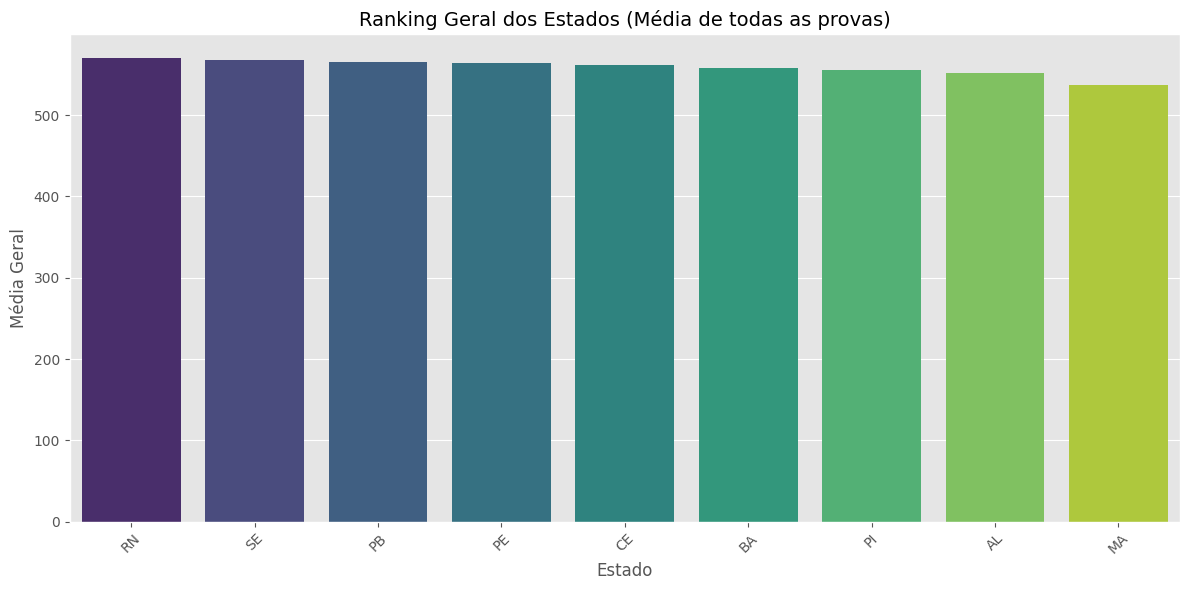

In [ ]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=ranking_geral,
    x='SG_UF_PROVA',
    y='MEDIA_GERAL',
    hue='SG_UF_PROVA',
    palette='viridis',
    dodge=False
)

plt.title('Ranking Geral dos Estados (Média de todas as provas)', fontsize=14)
plt.xlabel('Estado', fontsize=12)
plt.ylabel('Média Geral', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


O gráfico apresenta a média geral das notas de todas as provas (objetivas e redação) por estado, oferecendo uma visão mais abrangente do desempenho dos participantes no ENEM. O Rio Grande do Norte (RN) se mantém na liderança, consolidando o bom desempenho já observado nas provas objetivas e mantendo-se entre os primeiros também na redação. Sergipe (SE), que havia se destacado na redação, também aparece bem colocado no ranking geral. Já o Ceará (CE), frequentemente reconhecido por suas políticas educacionais inovadoras, ocupa uma posição intermediária, abaixo de estados como PB e PE, o que nos leva novamente a ideia de que por ser um estado maior a sua média acaba sendo mais baixa.

In [ ]:
df_presentes.head(20)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q023,Q024,Q025,ACERTOS_CN,ACERTOS_MT,ACERTOS_LC,ACERTOS_CH,ACERTOS_GERAL,MEDIA_OBJETIVAS,renda_per_capita
1389643,210059388839,2023,3,F,1,1,1,2,0,2,...,A,B,B,12,23,13,28,76,616.725,577.5
3537934,210061589753,2023,6,F,1,1,1,1,2,1,...,A,A,A,9,8,13,22,52,487.500,264.0
983040,210061308732,2023,3,F,1,1,1,1,1,1,...,B,C,B,14,19,12,35,80,616.550,7255.0
950274,210059147025,2023,6,F,1,3,1,1,4,1,...,A,A,B,13,7,14,24,58,533.675,660.0
973972,210059385753,2023,11,M,1,1,1,1,9,1,...,A,A,B,17,28,8,19,72,583.025,1320.0
883106,210061146634,2023,2,M,1,2,1,2,0,3,...,A,B,B,16,28,11,34,89,649.200,1540.0
1406109,210060690544,2023,1,F,1,3,1,3,0,1,...,A,A,B,7,5,16,10,38,406.275,0.0
1679659,210061594366,2023,2,M,1,3,1,3,0,1,...,A,A,B,19,22,9,36,86,638.850,770.0
3565765,210059683591,2023,2,F,1,3,1,3,0,1,...,A,A,A,9,15,15,19,58,516.550,330.0
2036299,210060385235,2023,5,F,1,2,1,1,1,1,...,A,A,B,14,17,15,34,80,599.050,660.0


### Ranking de média geral para os estados por tipo de escola

Escolas federais:

In [ ]:
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']

federais_nordeste = df_presentes[
    (df_presentes['TP_DEPENDENCIA_ADM_ESC'] == 1) &
    (df_presentes['SG_UF_PROVA'].isin(estados_nordeste))
].copy()


notas_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

federais_nordeste.loc[:, 'MEDIA_GERAL'] = federais_nordeste[notas_cols].mean(axis=1)

media_nordeste = federais_nordeste.groupby('SG_UF_PROVA')['MEDIA_GERAL'].mean().reset_index()

media_nordeste = media_nordeste.sort_values(by='MEDIA_GERAL', ascending=False)

print(media_nordeste)


  SG_UF_PROVA  MEDIA_GERAL
7          RN   613.015447
5          PE   604.147299
1          BA   600.512961
2          CE   596.445296
4          PB   591.346890
0          AL   576.920074
6          PI   561.372522
8          SE   555.607818
3          MA   536.736373


Escolas estaduais:

In [ ]:
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']

estaduais_nordeste = df_presentes[
    (df_presentes['TP_DEPENDENCIA_ADM_ESC'] == 2) &
    (df_presentes['SG_UF_PROVA'].isin(estados_nordeste))
].copy()

notas_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

estaduais_nordeste.loc[:, 'MEDIA_GERAL'] = estaduais_nordeste[notas_cols].mean(axis=1)

media_nordeste = estaduais_nordeste.groupby('SG_UF_PROVA')['MEDIA_GERAL'].mean().reset_index()

media_nordeste = media_nordeste.sort_values(by='MEDIA_GERAL', ascending=False)

print(media_nordeste)

  SG_UF_PROVA  MEDIA_GERAL
5          PE   511.594810
7          RN   509.090661
1          BA   501.489325
8          SE   500.155354
4          PB   497.211212
2          CE   488.279919
6          PI   485.425528
3          MA   484.427953
0          AL   476.187860


Escolas privadas:

In [ ]:
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']

privadas_nordeste = df_presentes[
    (df_presentes['TP_DEPENDENCIA_ADM_ESC'] == 4) &
    (df_presentes['SG_UF_PROVA'].isin(estados_nordeste))
].copy()

notas_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

privadas_nordeste.loc[:, 'MEDIA_GERAL'] = privadas_nordeste[notas_cols].mean(axis=1)

media_nordeste = privadas_nordeste.groupby('SG_UF_PROVA')['MEDIA_GERAL'].mean().reset_index()

media_nordeste = media_nordeste.sort_values(by='MEDIA_GERAL', ascending=False)

print(media_nordeste)

  SG_UF_PROVA  MEDIA_GERAL
6          PI   632.173687
2          CE   624.168392
7          RN   618.380713
4          PB   615.613546
8          SE   615.354010
1          BA   613.056626
5          PE   607.736357
3          MA   601.407664
0          AL   586.786084


Visualizando o ranking por estado e por tipo de escola:

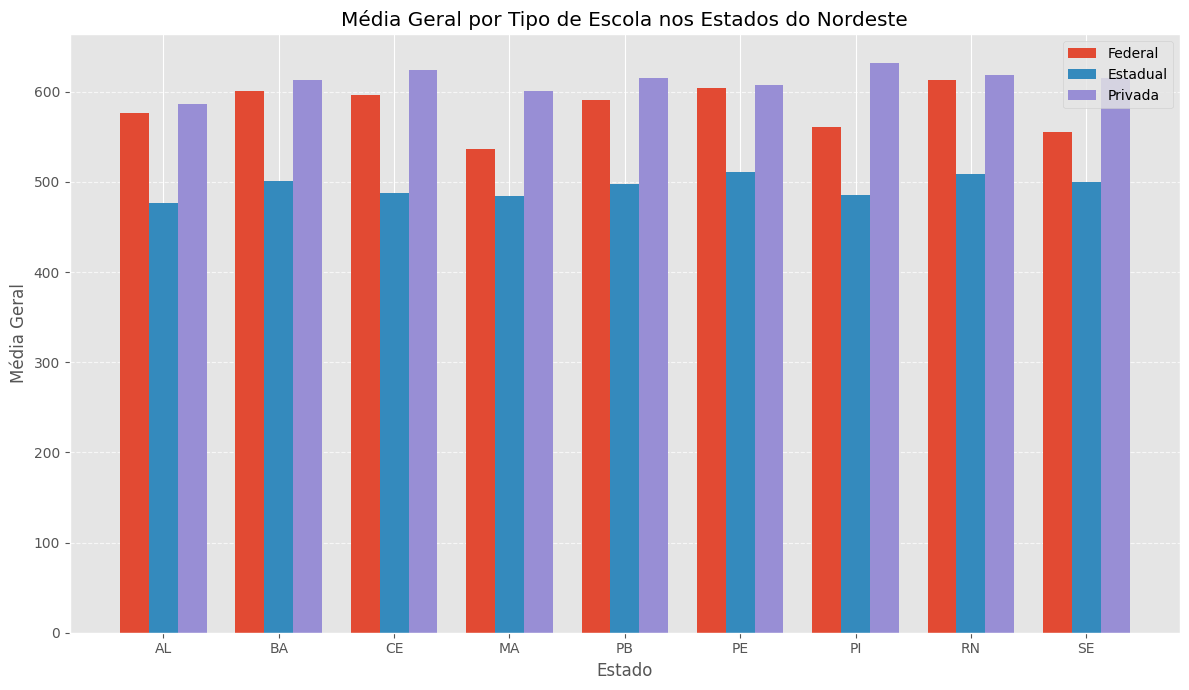

In [ ]:
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
notas_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

def calcular_media_por_tipo(tipo, df, estados):
    df_tipo = df_presentes[(df_presentes['TP_DEPENDENCIA_ADM_ESC'] == tipo) & (df_presentes['SG_UF_PROVA'].isin(estados))].copy()
    df_tipo['MEDIA_GERAL'] = df_tipo[notas_cols].mean(axis=1)
    return df_tipo.groupby('SG_UF_PROVA')['MEDIA_GERAL'].mean()

media_federal = calcular_media_por_tipo(1, df_presentes, estados_nordeste)
media_estadual = calcular_media_por_tipo(2, df_presentes, estados_nordeste)
media_privada = calcular_media_por_tipo(4, df_presentes, estados_nordeste)

df_medias = pd.DataFrame({
    'Federal': media_federal,
    'Estadual': media_estadual,
    'Privada': media_privada
}).reset_index()

bar_width = 0.25
x = np.arange(len(df_medias['SG_UF_PROVA']))

plt.figure(figsize=(12, 7))
plt.bar(x - bar_width, df_medias['Federal'], width=bar_width, label='Federal')
plt.bar(x, df_medias['Estadual'], width=bar_width, label='Estadual')
plt.bar(x + bar_width, df_medias['Privada'], width=bar_width, label='Privada')

plt.xlabel('Estado')
plt.ylabel('Média Geral')
plt.title('Média Geral por Tipo de Escola nos Estados do Nordeste')
plt.xticks(x, df_medias['SG_UF_PROVA'])
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Podemos perceber que, em todos os casos, candidatos que fizeram o Ensino Médio em escolas privadas tiveram um desempenho melhor em todos os estados. Como esperado, os candidatos de escolas estaduais tiveram o pior desempenho em todos os estados, o que pode se dar por diversos fatores, dentre eles: maior número de estudantes, falta de infraestrutura e investimentos

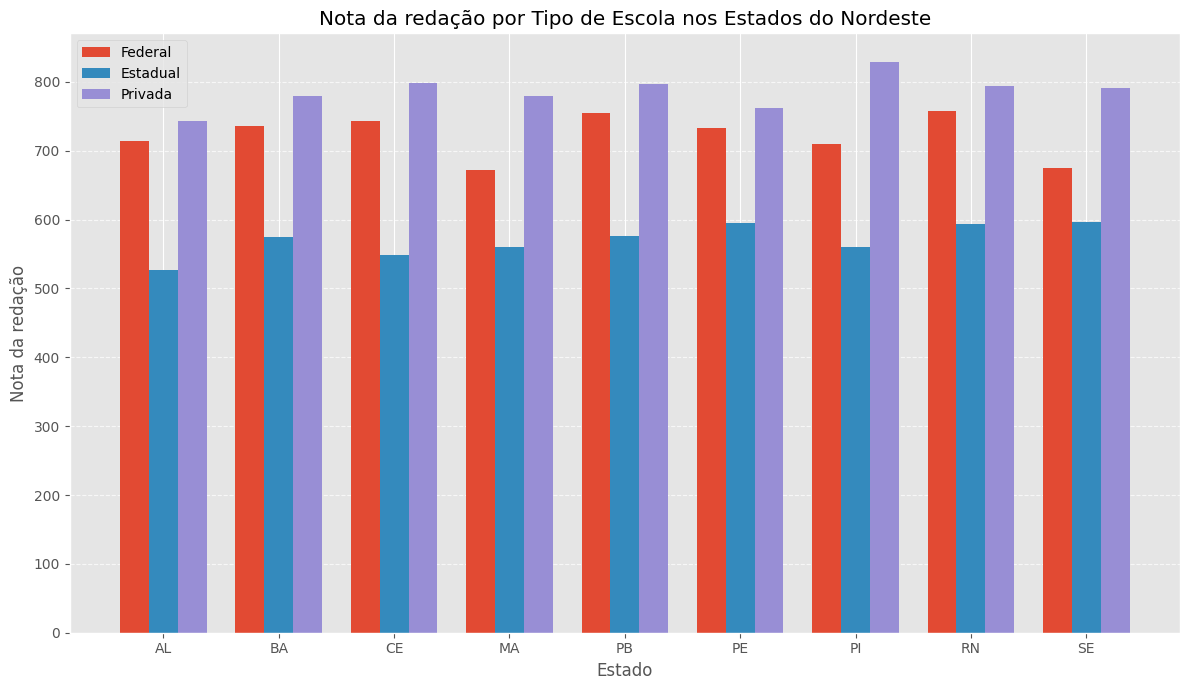

In [ ]:
estados_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
notas_cols = ['NU_NOTA_REDACAO']

def calcular_media_por_tipo(tipo, df_presentes, estados):
    df_tipo = df_presentes[(df_presentes['TP_DEPENDENCIA_ADM_ESC'] == tipo) & (df_presentes['SG_UF_PROVA'].isin(estados))].copy()
    df_tipo['MEDIA_GERAL'] = df_tipo[notas_cols].mean(axis=1)
    return df_tipo.groupby('SG_UF_PROVA')['MEDIA_GERAL'].mean()

media_federal = calcular_media_por_tipo(1, df_presentes, estados_nordeste)
media_estadual = calcular_media_por_tipo(2, df_presentes, estados_nordeste)
media_privada = calcular_media_por_tipo(4, df_presentes, estados_nordeste)

df_medias = pd.DataFrame({
    'Federal': media_federal,
    'Estadual': media_estadual,
    'Privada': media_privada
}).reset_index()

bar_width = 0.25
x = np.arange(len(df_medias['SG_UF_PROVA']))

plt.figure(figsize=(12, 7))
plt.bar(x - bar_width, df_medias['Federal'], width=bar_width, label='Federal')
plt.bar(x, df_medias['Estadual'], width=bar_width, label='Estadual')
plt.bar(x + bar_width, df_medias['Privada'], width=bar_width, label='Privada')

plt.xlabel('Estado')
plt.ylabel('Nota da redação')
plt.title('Nota da redação por Tipo de Escola nos Estados do Nordeste')
plt.xticks(x, df_medias['SG_UF_PROVA'])
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


O padrão de discrepância entre as esferas administrativas se mantem com algumas variações de notas como é o caso do Piauí que na esfera privada atingiu 850 de média

## Disparidade entre municípios

  Vamos analisar as disparidades entre os municípios para tentar identificar padrões

### Municípois do Rio Grande do Norte:




In [ ]:
df_presentes['MEDIA_GERAL'] = df_presentes[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

media_municipio = df_presentes.groupby(['SG_UF_PROVA', 'NO_MUNICIPIO_PROVA'])['MEDIA_GERAL'].mean().reset_index()

/tmp/ipython-input-66-2794391764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_rn, x='MEDIA_GERAL', y='NO_MUNICIPIO_PROVA', palette='viridis')


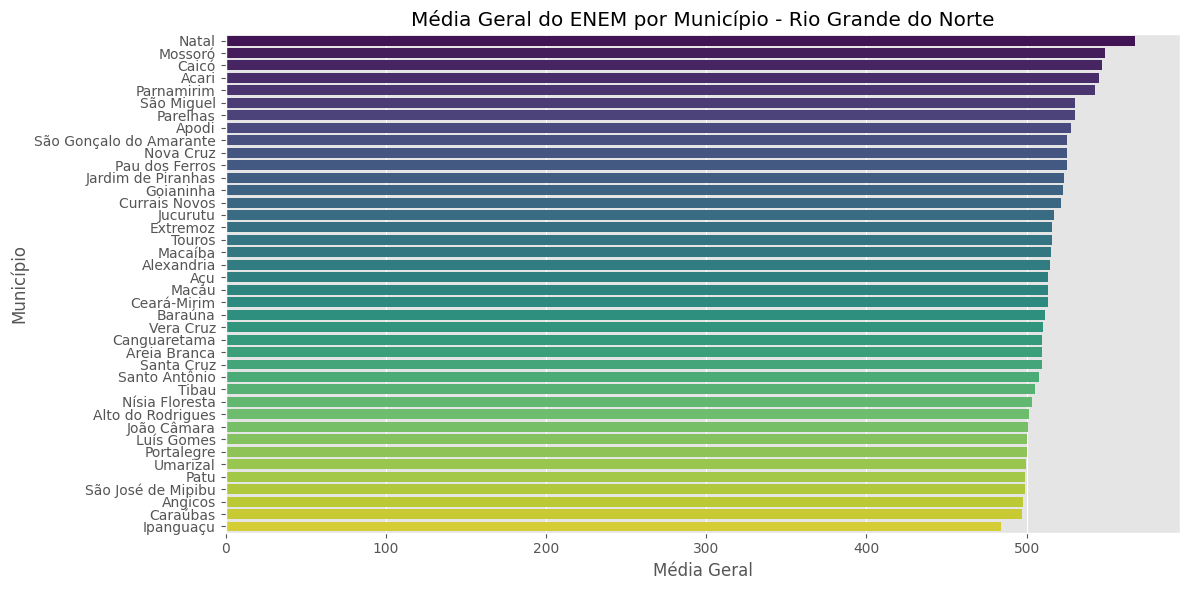

In [ ]:
media_rn = media_municipio[media_municipio['SG_UF_PROVA'] == 'RN'].sort_values(by='MEDIA_GERAL', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=media_rn, x='MEDIA_GERAL', y='NO_MUNICIPIO_PROVA', palette='viridis')
plt.title('Média Geral do ENEM por Município - Rio Grande do Norte')
plt.xlabel('Média Geral')
plt.ylabel('Município')
plt.tight_layout()
plt.show()


O gráfico revela  uma clara desigualdade no desempenho entre as cidades. Natal, capital do estado, lidera com a maior média, seguida por outros grandes centros urbanos como Mossoró e Caicó. Esses municípios tendem a concentrar melhores escolas, maior infraestrutura educacional, acesso a cursinhos preparatórios e maior presença de escolas federais e privadas, fatores que influenciam diretamente no bom desempenho dos estudantes.
=Por outro lado, municípios menores e com menor investimento em educação, como Ipanguaçu, Carnaúbas e Angicos, aparecem nas últimas posições com as médias mais baixas. Essa diferença reflete a disparidade regional dentro do próprio estado, onde alunos de áreas menos favorecidas enfrentam maiores dificuldades para alcançar bons resultados no ENEM.


### Análise dos municípios da Bahia:

/tmp/ipython-input-67-1049801410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_bahia, x='MEDIA_GERAL', y='NO_MUNICIPIO_PROVA', palette='viridis')


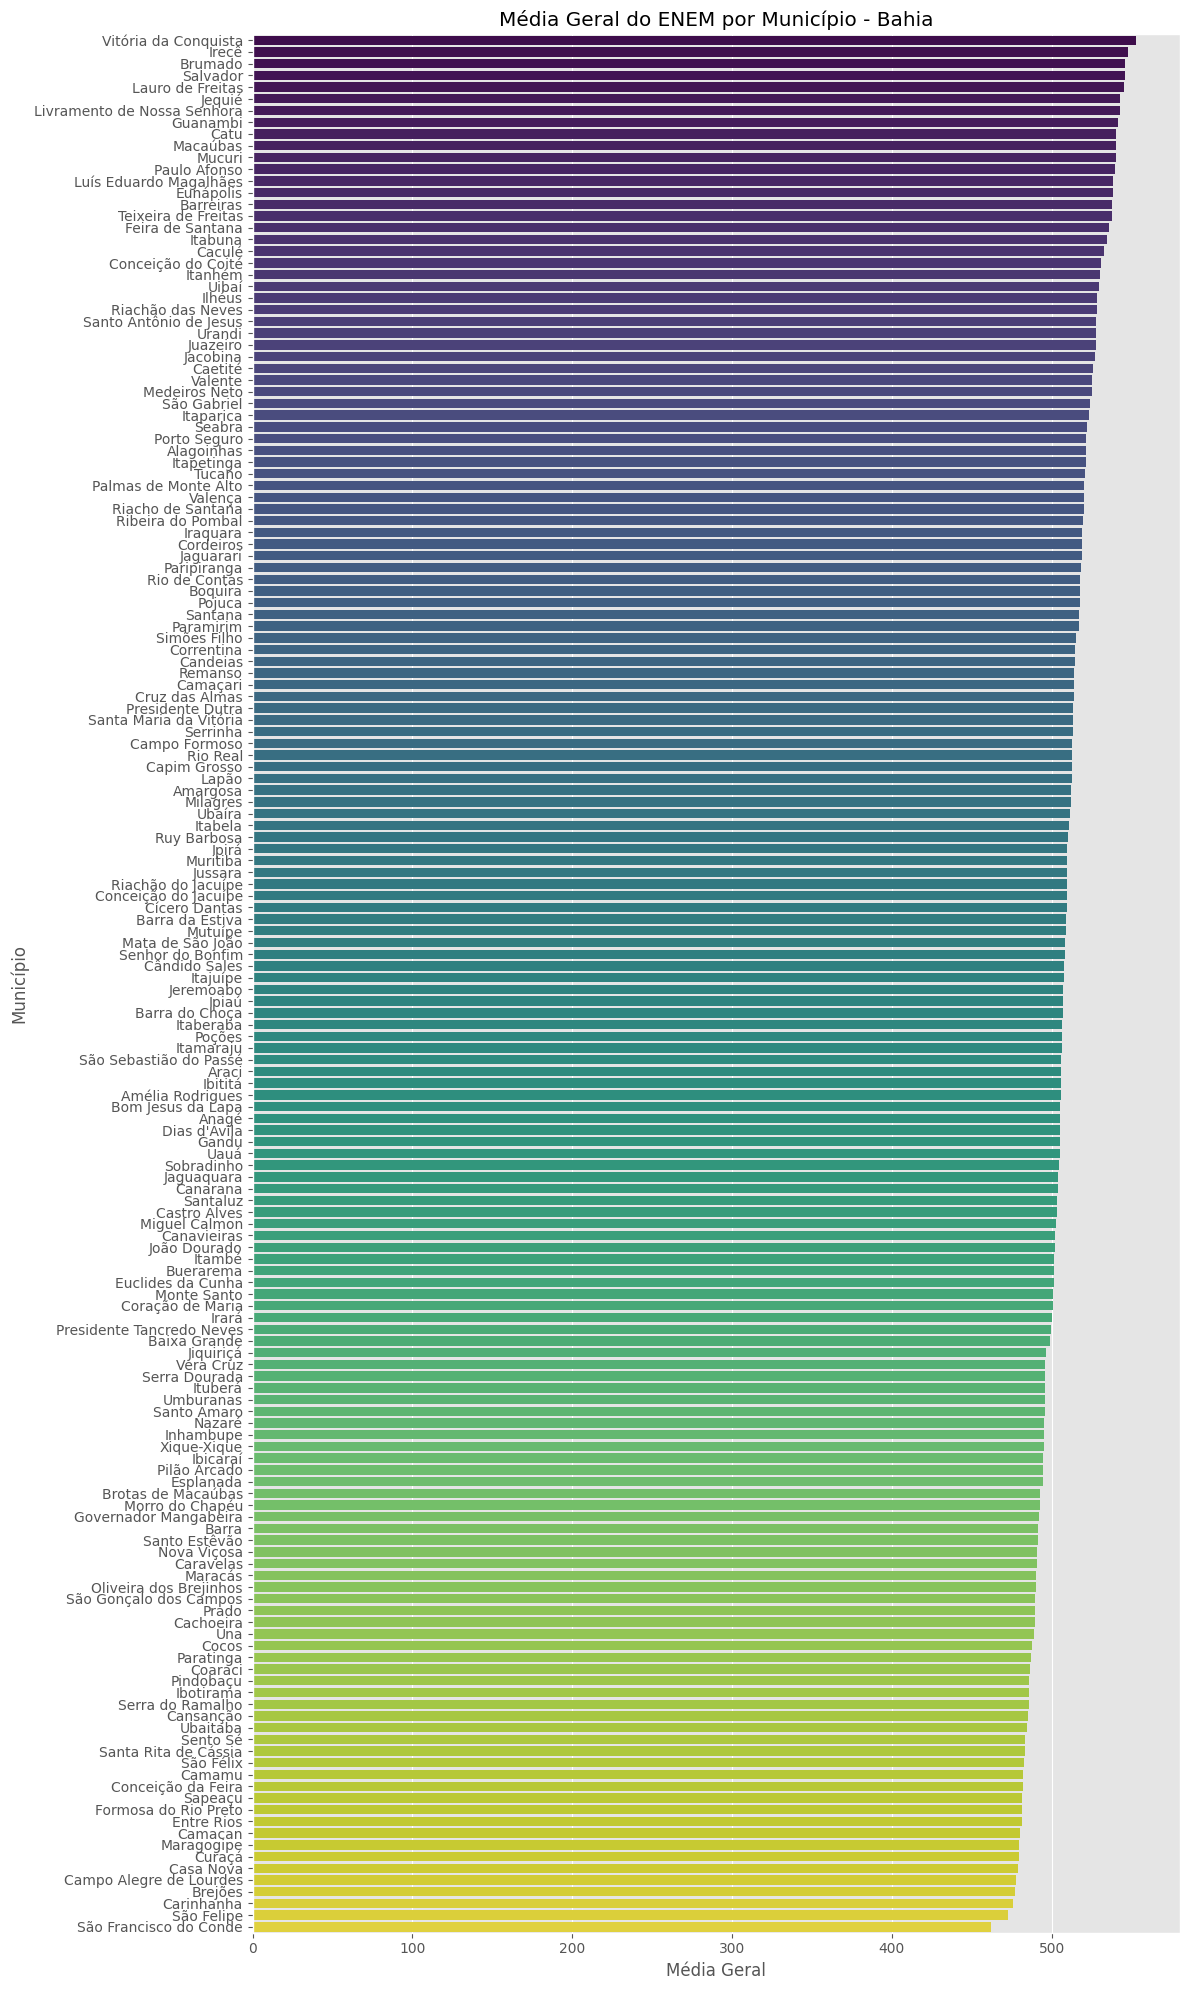

In [ ]:

media_bahia = media_municipio[media_municipio['SG_UF_PROVA'] == 'BA'].sort_values(by='MEDIA_GERAL', ascending=False)

plt.figure(figsize=(12, 20))
sns.barplot(data=media_bahia, x='MEDIA_GERAL', y='NO_MUNICIPIO_PROVA', palette='viridis')
plt.title('Média Geral do ENEM por Município - Bahia')
plt.xlabel('Média Geral')
plt.ylabel('Município')
plt.tight_layout()
plt.show()


O gráfico da Bahia mostra uma grande variação nas médias do ENEM entre os municípios, e é importante destacar que o estado possui um número significativamente maior de municípios em comparação com o Rio Grande do Norte. Essa quantidade mais ampla de cidades pode influenciar diretamente na média geral do estado, já que há uma maior incidência de municípios com baixos desempenhos que puxam a média para baixo. Além disso, com mais municípios pequenos e rurais, onde geralmente há menos acesso a recursos educacionais de qualidade, a desigualdade nos resultados se torna mais evidente. Esse fator reforça a necessidade de considerar o tamanho e a distribuição populacional ao comparar o desempenho médio entre estados.

### Análise dos municípios do Ceará:

/tmp/ipython-input-68-758419365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_ce, x='MEDIA_GERAL', y='NO_MUNICIPIO_PROVA', palette='viridis')


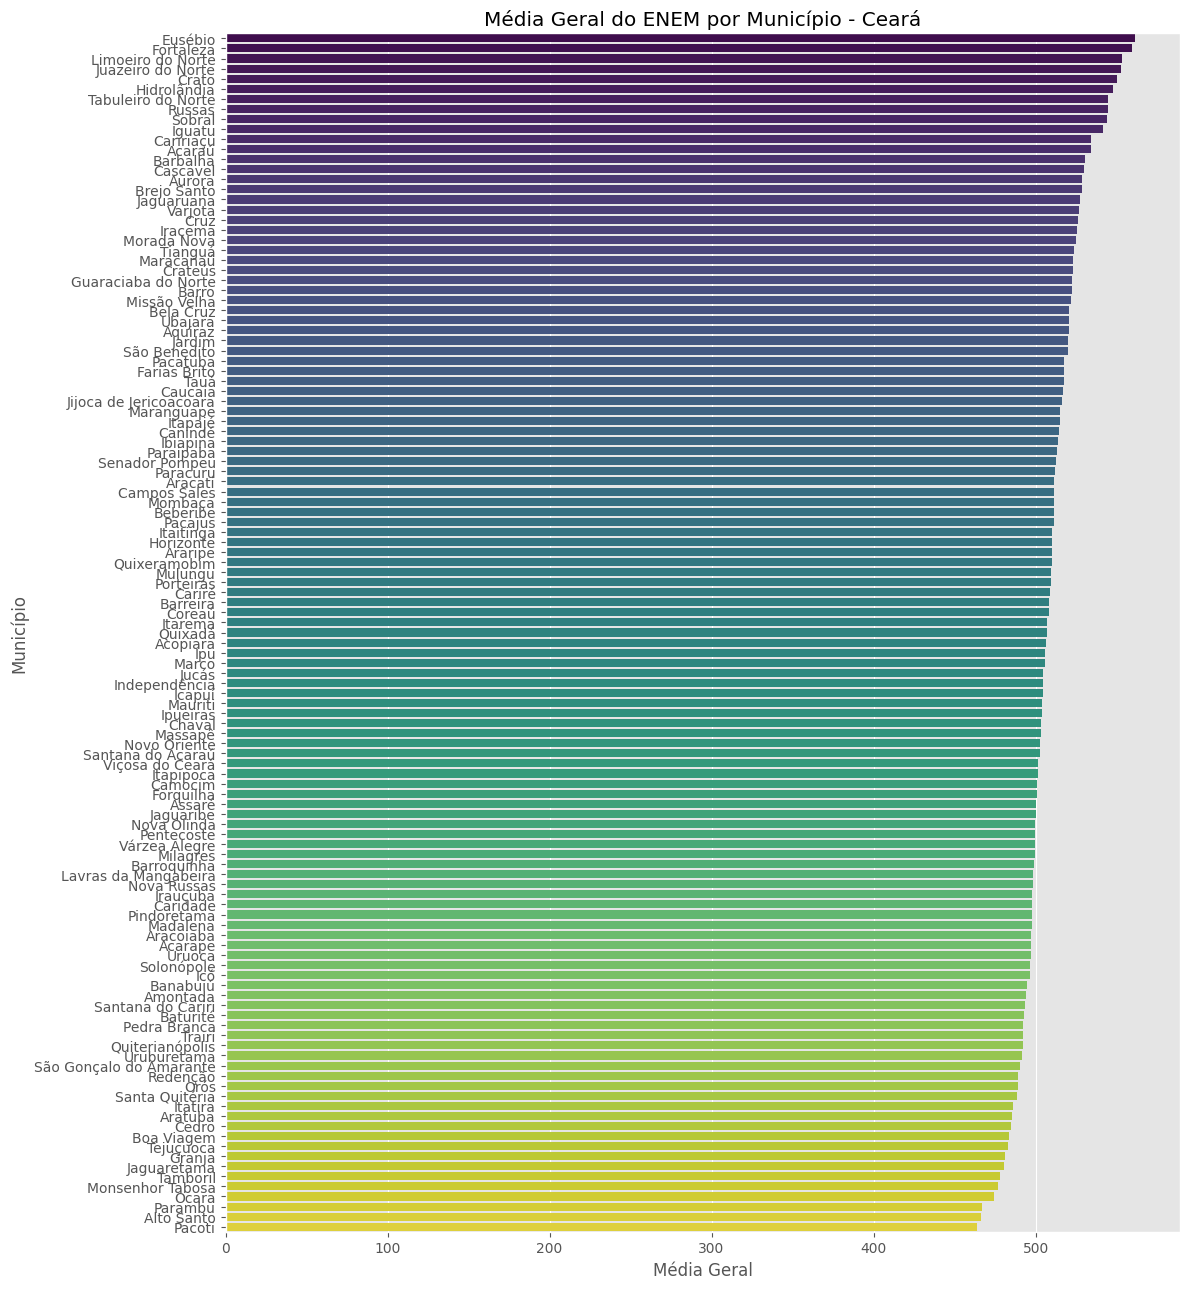

In [ ]:
media_ce = media_municipio[media_municipio['SG_UF_PROVA'] == 'CE'].sort_values(by='MEDIA_GERAL', ascending=False)

plt.figure(figsize=(12, 13))
sns.barplot(data=media_ce, x='MEDIA_GERAL', y='NO_MUNICIPIO_PROVA', palette='viridis')
plt.title('Média Geral do ENEM por Município - Ceará')
plt.xlabel('Média Geral')
plt.ylabel('Município')
plt.tight_layout()
plt.show()


O gráfico referente ao estado do Ceará revela uma ampla variação nas médias do ENEM entre os municípios, com uma concentração das maiores médias em cidades mais urbanizadas, como Eusébio, Fortaleza e Juazeiro do Norte. Assim como observado na Bahia, o Ceará possui um número elevado de municípios, o que pode impactar significativamente na média geral do estado. Isso ocorre porque, com um número maior de cidades, especialmente pequenas e rurais, aumentam também os casos de desempenho mais baixo, o que tende a puxar a média para baixo.


### Verificando ilhas de excelência:

Vamos ver as "ilhas de excelência": municípios muito acima da média do estado, que possam ser exemplos de boas práticas.

In [ ]:
estatisticas_estado = media_municipio.groupby('SG_UF_PROVA')['MEDIA_GERAL'].agg(['mean', 'std']).reset_index()
media_municipio = media_municipio.merge(estatisticas_estado, on='SG_UF_PROVA')
# Define "ilha de excelência" como média do município > média do estado + 2*desvio padrão
media_municipio['ILHA_EXCELENCIA'] = media_municipio['MEDIA_GERAL'] > (media_municipio['mean'] + 2 * media_municipio['std'])

ilhas = media_municipio[media_municipio['ILHA_EXCELENCIA'] == True]

print(ilhas[['SG_UF_PROVA', 'NO_MUNICIPIO_PROVA', 'MEDIA_GERAL']])

    SG_UF_PROVA    NO_MUNICIPIO_PROVA  MEDIA_GERAL
9            AL                Maceió   539.126746
40           BA               Brumado   546.136044
91           BA                 Irecê   547.752995
112          BA      Lauro de Freitas   545.452096
151          BA              Salvador   545.629774
186          BA  Vitória da Conquista   552.658214
222          CE                 Crato   550.179956
224          CE               Eusébio   561.088276
227          CE             Fortaleza   559.579786
230          CE           Hidrolândia   547.849259
251          CE     Juazeiro do Norte   552.450811
254          CE     Limoeiro do Norte   553.166592
342          MA            Imperatriz   533.633266
372          MA              São Luís   527.043831
400          PB        Campina Grande   549.442575
412          PB           João Pessoa   556.897005
439          PB               Tavares   546.927840
504          PE                Recife   556.416153
553          PI              Te

In [ ]:
ilhas_ordenadas = ilhas[['SG_UF_PROVA', 'NO_MUNICIPIO_PROVA', 'MEDIA_GERAL']].sort_values(by='MEDIA_GERAL', ascending=False)
print(ilhas_ordenadas)

    SG_UF_PROVA    NO_MUNICIPIO_PROVA  MEDIA_GERAL
581          RN                 Natal   567.391198
224          CE               Eusébio   561.088276
227          CE             Fortaleza   559.579786
412          PB           João Pessoa   556.897005
504          PE                Recife   556.416153
598          SE               Aracaju   555.885105
553          PI              Teresina   553.481871
254          CE     Limoeiro do Norte   553.166592
186          BA  Vitória da Conquista   552.658214
251          CE     Juazeiro do Norte   552.450811
222          CE                 Crato   550.179956
400          PB        Campina Grande   549.442575
230          CE           Hidrolândia   547.849259
91           BA                 Irecê   547.752995
439          PB               Tavares   546.927840
40           BA               Brumado   546.136044
151          BA              Salvador   545.629774
112          BA      Lauro de Freitas   545.452096
9            AL                

Visualizando em um gráfico:

/tmp/ipython-input-71-3620032872.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


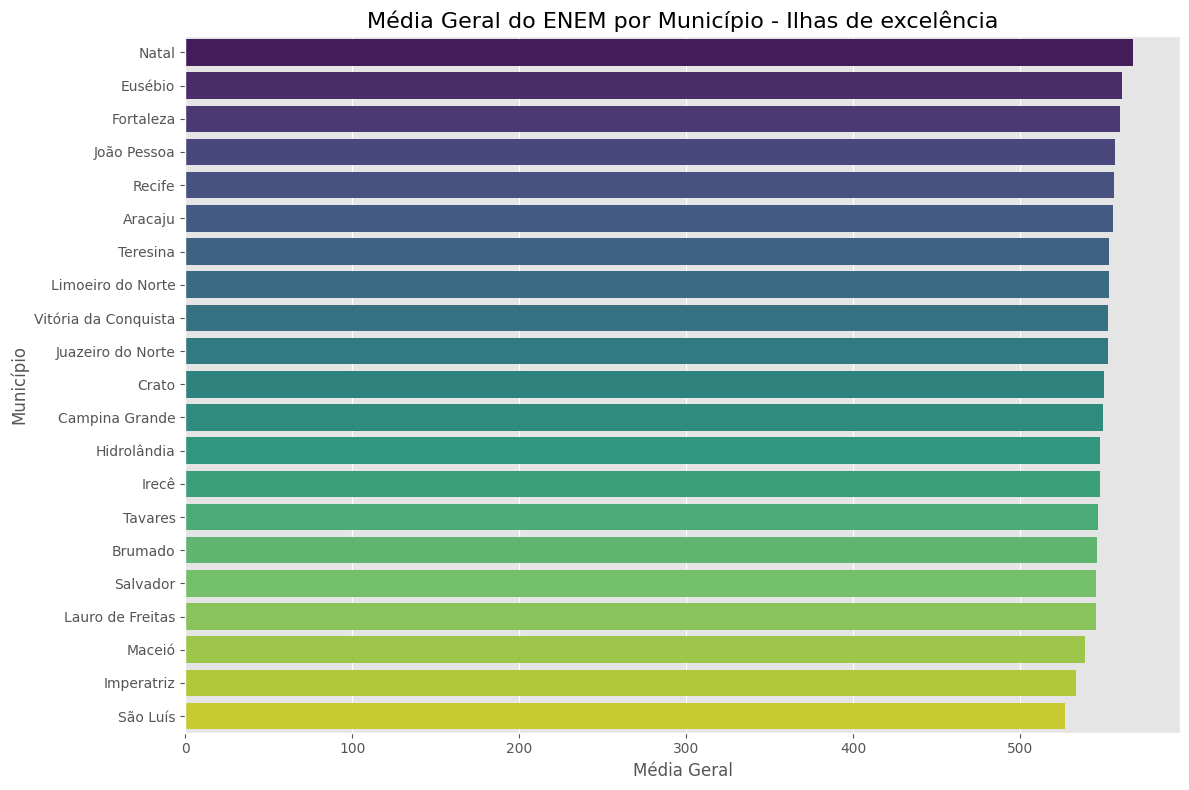

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(
    data=ilhas_ordenadas,
    x='MEDIA_GERAL',
    y='NO_MUNICIPIO_PROVA',
    palette='viridis'
)

plt.title('Média Geral do ENEM por Município - Ilhas de excelência', fontsize=16)
plt.xlabel('Média Geral', fontsize=12)
plt.ylabel('Município', fontsize=12)

plt.tight_layout()

plt.show()

A análise desse gráfico revela exatamente esse fenômeno: cidades com desempenho notavelmente elevado, formando verdadeiros polos de qualidade educacional no Nordeste. Natal (RN) lidera a lista, seguida de Eusébio e Fortaleza (CE), evidenciando o bom desempenho de centros urbanos e de municípios com histórico de investimentos em educação. No total, o Ceará aparece com 6 municípios e a Bahia com 5, mostrando que, quando se isola o efeito da média estadual diluída pelo alto número de participantes, esses estados revelam núcleos de excelência educacional.


# Matriz de correlação